<a href="https://colab.research.google.com/github/mpaulina24/Paulina/blob/main/Proyecto4_Biose%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Revisión teórica del artículo "Optimal Multi-Stage Arrhythmia Classification Approach" [1]**


El artículo describe un enfoque novedoso para la extracción de características a partir de señales ECG, diseñado específicamente para mejorar la precisión en la clasificación de arritmias. Este método propone resolver problemas comunes en el análisis de ECG, como la variabilidad en la morfología de las ondas, las diferencias entre individuos (edad, género, raza) y las distorsiones provocadas por ruido o enfermedades cardíacas.

Para esto realizaron un análisis de enfoques de selección de características que incluyó un total de 11 escenarios distintos. El primer y más simple conjunto de características incluyó solo 11 características básicas de la señal, mientras que el conjunto más grande incluyó 39,830 características que incluyen desde atributos básicos hasta distribuciones empíricas complejas. También aplicarón un algoritmo de máximo-mínimo para escalar la amplitud de las señales ECG, asegurando que las diferencias en amplitud entre pacientes no afecten la clasificación.

Entre las características seleccionadas, se incluyeron mediciones detalladas de los picos y valles del ECG, como alturas, anchos, prominencias y relaciones temporales entre ellos. Estas características se organizaron en tablas de distribución de frecuencias para garantizar uniformidad y permitir su uso como entrada en modelos de clasificación. También se incorporaron atributos específicos, como intervalos RR y sus estadísticas, para capturar la dinámica de los latidos.

También diseñaron características avanzadas específicas para la derivación II del ECG, generando frecuencias basadas en relaciones entre picos, valles y complejos QRS. Este enfoque permite capturar de manera robusta y completa las características clave de las ondas P, Q, R, S y T, proporcionando una base sólida para clasificar ritmos cardíacos con mayor precisión. Los resultados respaldan la efectividad y fiabilidad de este método. Estas relaciones se convierten en distribuciones empíricas de frecuencia, lo que permite representar patrones de distorsión o desaparición de ondas.

### **Desaparición de Ondas en el Complejo PQRS y su Impacto en la Clasificación**

La desaparición o alteración de formas de onda en el ECG, como las ondas P, tiene implicaciones significativas tanto en el diagnóstico clínico como en los sistemas automáticos de clasificación. Dentro del articulo se presentan algunos casos como el de AFIB y AFL que se caracteriza por la ausencia de ondas P normales, las cuales son reemplazadas por ondas fibrilatorias irregulares y de baja amplitud. En estos casos, las métricas estándar (como la duración del intervalo PR) no es posible aplicarlas, lo que requiere analizar la señal según las características del complejo QRS y los intervalos RR.

###**Estrategias para tratar ondas ausentes**

El artículo propone una solución basada en la extracción de relaciones entre atributos de las señales. Por ejemplo, Cuando una onda está ausente (como la P en AFIB), se analiza la distribución de atributos como la prominencia, la altura y las diferencias temporales entre los picos restantes. Esto permite capturar patrones únicos del ritmo sin depender de formas de onda específicas.

También se analiza la variabilidad de los intervalos RR se usa como una métrica clave en arritmias como AFIB, donde el ritmo ventricular es irregular.Además, Se utilizan señales de múltiples derivaciones para compensar la falta de información en una sola derivación.

###**Comparación con otros métodos**

**Redes neuronales profundas:** Son eficaces para clasificar arritmias, pero carecen de transparencia y requieren grandes volúmenes de datos para entrenarse.

**Transformaciones Wavelet:** Capturan información frecuencial pero pierden detalles temporales cruciales para arritmias con patrones irregulares.

## **Importación de librerías**

In [ ]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 14.4 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk

In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import welch as pwelch
import os
import pywt  # Biblioteca para transformadas wavelet
from scipy import signal
import seaborn as sns

## **Importación de la base de datos de señales ECG procesadas por los autores del artículo "Higher order spectral analysis of ECG signals" [2]** (Proyecto 2)

Al comparar la frecuencia de máxima potencia obtenida a partir de las señales procesadas en el Proyecto 2 con los resultados del procesamiento realizado en el Proyecto 3, se observa que ambos enfoques logran capturar de manera precisa las diferencias esperadas entre la bradicardia sinusal (SB) y la fibrilación auricular (AFIB). Sin embargo, los resultados del Proyecto 2 presentan una menor variabilidad, lo que refleja una mayor robustez en la metodología y una mejor coherencia con la fisiología cardíaca.

El procesamiento utilizado en el Proyecto 2 incluye técnicas avanzadas, como la estimación de bispectro y bicoherencia, que permiten analizar el acoplamiento de fase entre las frecuencias en las señales de ECG. Estas metodologías son adecuadas para identificar características no lineales y caóticas de la dinámica cardíaca, lo cual es esencial para diferenciar entre estados normales y patológicos. Además, el artículo reporta resultados validados en un conjunto diverso de casos, tanto en individuos sanos como en aquellos con enfermedades específicas, lo que refuerza la confiabilidad de su flujo de procesamiento.

La base de datos utilizada en el artículo proviene de la base de datos PTB, disponible en Physionet, la cual es ampliamente reconocida en la comunidad científica. Esto garantiza la calidad y representatividad de los datos analizados.

Por lo tanto, la elección de los datos procesados por los autores del artículo asegura que el análisis esté respaldado por técnicas probadas, resultados coherentes con la fisiología cardíaca, y un enfoque robusto y validado científicamente.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se carga el archivo de Excel
file_path = '/content/drive/MyDrive/Diagnostics.xlsx'
df = pd.read_excel(file_path)

## Extracción de señales ECG de bradicardia sinusal (SB) y fibrilación auricular (AFIB) de la derivación II

In [ ]:
df_SB_AFIB = df[df['Rhythm'].isin(['AFIB','SB'])]
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
nombres_filtrados = df_SB_AFIB['FileName'].str.strip().str.lower().tolist()
nombres_filtrados = [f"{name}.csv" if not name.endswith(".csv") else name for name in nombres_filtrados]
data_by_file_sb = {}
data_by_file_afib = {}

folder_path = '/content/drive/MyDrive/ECGDataDenoised'

dfs_sb = []
dfs_afib = []

for filename in os.listdir(folder_path):
    filename_clean = filename.strip().lower()

    if filename_clean in nombres_filtrados:
        file_path = os.path.join(folder_path, filename)
        file_index = nombres_filtrados.index(filename_clean)
        ritmo = df_SB_AFIB.iloc[file_index]['Rhythm'].lower()

        # Se verifica si el archivo está vacío antes de leer
        if os.stat(file_path).st_size > 0:
            try:

                df = pd.read_csv(file_path, header=None)
                df.columns = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

                df.insert(0, 'FileName', filename)
                df.insert(1, 'Ritmo', ritmo)
                selected_df = df[['FileName', 'Ritmo', 'II']]

                #Se guarda los datos de la columna 'II' en una lista asociada al nombre del archivo
                data_column_ii = selected_df['II'].tolist()

                # Dependiendo del ritmo, se añade al DataFrame correspondiente
                if ritmo == 'sb':
                    data_by_file_sb[filename] = data_column_ii
                    dfs_sb.append(pd.DataFrame({'FileName': filename, 'II': [data_column_ii]}))
                elif ritmo == 'afib':
                    data_by_file_afib[filename] = data_column_ii
                    dfs_afib.append(pd.DataFrame({'FileName': filename, 'II': [data_column_ii]}))
            except pd.errors.EmptyDataError:
                print(f"Advertencia: El archivo {filename} está vacío o no tiene datos válidos.")
        else:
            print(f"Advertencia: El archivo {filename} está vacío y ha sido omitido.")


if len(dfs_sb) == 0 and len(dfs_afib) == 0:
    print("No se encontraron archivos coincidentes o válidos.")
else:

    df_SB= pd.concat(dfs_sb, ignore_index=True) if len(dfs_sb) > 0 else None
    df_AFIB = pd.concat(dfs_afib, ignore_index=True) if len(dfs_afib) > 0 else None

## Normalización de las señales ECG procesadas (SB y AFIB)

A partir del análisis del artículo de referencia [1], se resalta la importancia de la normalización de señales ECG para garantizar la precisión y validez de su análisis y comparación al permitir que las señales se encuentren dentro de una escala comparable, eliminando fuentes de variabilidad externas y centrar el análisis en las características fisiológicas relevantes de la señal ECG. Para esto, se realiza primero un detrending para eliminar las tendencias lineales de las señales, luego la compresión de la función para normalizar sus valores entre 0 y 1, y por último se apliza nuevamente un detrending para eliminar el offset que se pudo generar debido a la aplicación del paso anterior.

In [ ]:
def compression(serie):
    xmin = serie.min()
    xmax = serie.max()
    num = serie-xmin
    den = xmax - xmin
    comp = num/den
    return comp

In [ ]:
resultados_SB = [] # Lista para almacenar las señales filtradas finales y los índices

for index, row in df_SB.iterrows():
  file_name = row['FileName']
  señales_originales_SB = np.array(row['II'], dtype=float)

  # Normalización
  SB_detrended1 = signal.detrend(señales_originales_SB)
  SB_compressed1 = compression(pd.Series(SB_detrended1)).tolist()
  SB_detrended2 = signal.detrend(SB_compressed1)

  resultados_SB.append({"FileName": file_name, "SB_DATA": SB_detrended2})

# Convertir la lista de resultados en un DataFrame
df_resultados_SB = pd.DataFrame(resultados_SB)

In [ ]:
resultados_AFIB = [] # Lista para almacenar las señales filtradas finales y los índices

for index, row in df_AFIB.iterrows():
  file_name_AFIB = row['FileName']
  señales_originales_AFIB = np.array(row['II'], dtype=float)

  # Normalización
  AFIB_detrended1 = signal.detrend(señales_originales_AFIB)
  AFIB_compressed1 = compression(pd.Series(AFIB_detrended1)).tolist()
  AFIB_detrended2 = signal.detrend(AFIB_compressed1)

  resultados_AFIB.append({"FileName": file_name_AFIB, "AFIB_DATA": AFIB_detrended2})

# Convertir la lista de resultados en un DataFrame
df_resultados_AFIB = pd.DataFrame(resultados_AFIB)

## Frecuencia de máxima potencia calculada en el proyecto 2 mediante la fft

In [ ]:
DataFrame_P2 = pd.read_csv('/content/drive/My Drive/Espectro_completo_P2.csv')
DataFrame_P2.rename(columns={'Frecuencia_maxima_potencia': 'fMP'}, inplace=True)

## **Minitutorial Neurokit2**

En el siguiente enlace se encuentra el link que redirecciona hacia el minitutorial sobre el uso de Neurokit2 para el análisis de señales ECG: [Tutorial NeuroKit](https://colab.research.google.com/drive/1VqMkjGjMWMxfaHWVpgNbsTE9-fxiojw0?usp=sharing)

## **Implementación del tutorial**

Para mostrar la funcionalidad del tutorial, se seleccionaron 2 señales ECG, 1 correspondiente a la bradicardia sinusal y otra a fibrilación auricular con el fin de ilustrar las diferencias clave entre estos dos estados clínicos

### **Para la señal SB**

#### Graficación de la señal

<ipython-input-174-ee9d0fa8a55b>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  senal_SB = list(df_resultados_SB.iloc())[0][1].astype(float)


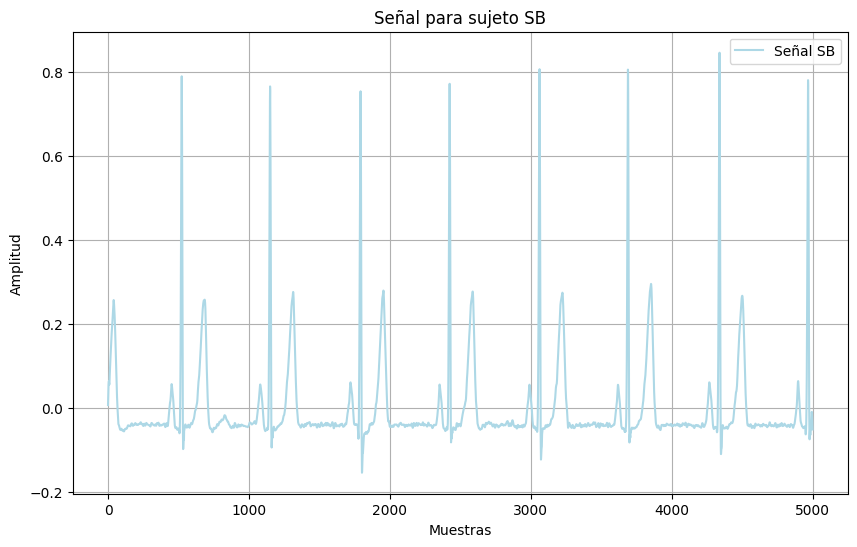

In [ ]:
senal_SB = list(df_resultados_SB.iloc())[0][1].astype(float)
senal_SB = np.array(senal_SB)

plt.figure(figsize=(10, 6))
plt.plot(senal_SB, label='Señal SB', color='lightblue')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal para sujeto SB')
plt.legend()
plt.grid()
plt.show()

#### Procesamiento y características de la señal mediante ecg_process()

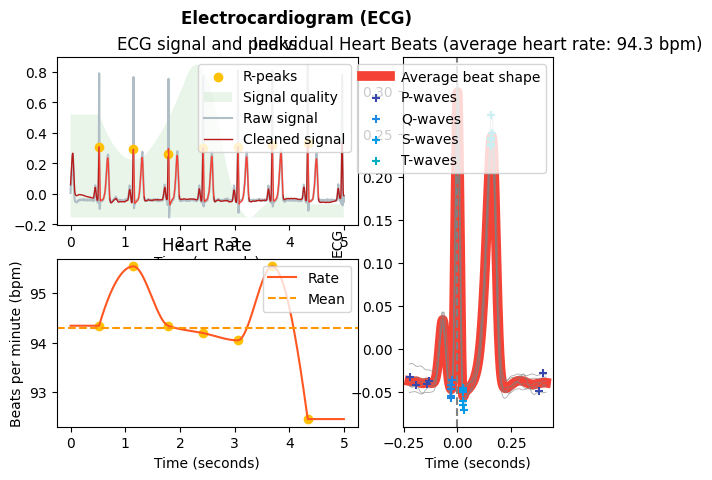

In [ ]:
señalSB, infoSB = nk.ecg_process(senal_SB, sampling_rate=1000)
nk.ecg_plot(señalSB, infoSB)

In [ ]:
info_df_SB = pd.DataFrame(list(infoSB.items()), columns=['Metric', 'Value'])
info_df_SB

,Metric,Value
0,method_peaks,neurokit
1,method_fixpeaks,None
2,ECG_R_Peaks,"[522, 1150, 1786, 2423, 3061, 3689, 4338]"
3,ECG_R_Peaks_Uncorrected,"[522, 1150, 1791, 2423, 3061, 3689, 4338]"
4,ECG_fixpeaks_ectopic,[]
...,...,...
22,ECG_R_Offsets,"[561, nan, 1833, 2483, 3103, nan, 4376]"
23,ECG_S_Peaks,"[548, 1176, 1816, 2450, 3086, 3715, nan]"
24,ECG_T_Peaks,"[678, 1307, 1948, 2580, 3218, 3846, 4496]"
25,ECG_T_Onsets,"[634, 1259, 1907, 2538, 3176, 3800, 4453]"


In [ ]:
r_peaks_SB = sum(infoSB["ECG_R_Peaks"])

# Calcula la desviación estándar
desviacion_estandar_SB = np.std(infoSB["ECG_R_Peaks"])

print(f"Sumatoria de amplitudes picos R: ",r_peaks_SB)
print(f"Desviación estándar picos R: ",desviacion_estandar_SB)

Sumatoria de amplitudes picos R:  16969
Desviación estándar picos R:  1271.5072527821267


In [ ]:
señalSB

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.006876,0.060549,94.339623,0.666728,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.021684,0.067234,94.339623,0.666728,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.035790,0.073879,94.339623,0.666728,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.048061,0.080448,94.339623,0.666728,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.057192,0.086916,94.339623,0.666728,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.012253,-0.008960,92.449923,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4996,-0.019140,-0.009309,92.449923,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4997,-0.028715,-0.009783,92.449923,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4998,-0.039714,-0.010406,92.449923,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [ ]:
print(f"Promedio fase ventricular: ",señalSB['ECG_Phase_Ventricular'].mean())
print(f"Frecuencia cardiaca promedio: ",señalSB['ECG_Rate'].mean())

Promedio fase ventricular:  0.34620174346201743
Frecuencia cardiaca promedio:  94.2971374462245


#### Identificación picos R

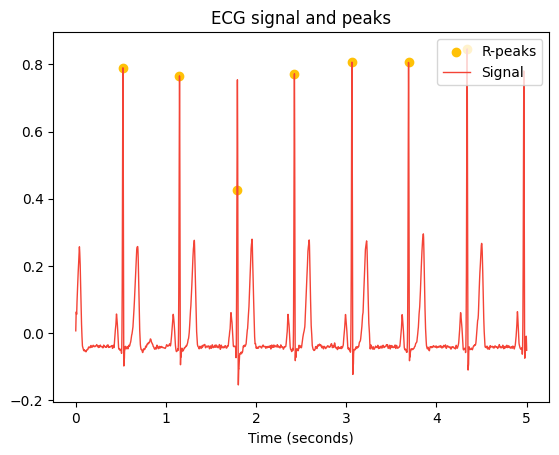

In [ ]:
signals, info = nk.ecg_peaks(senal_SB, sampling_rate=1000, correct_artifacts=True, show=True)

#### Frecuencia cardíaca (ecg_rate y signal_rate)

array([94.33962264, 94.33962264, 94.33962264, ..., 92.30769231,
       92.30769231, 92.30769231])

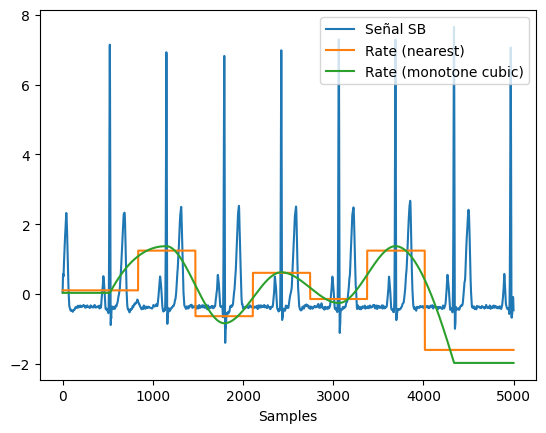

In [ ]:
rpeaks, info = nk.ecg_peaks(senal_SB, sampling_rate=1000)

# Compute rate using 2 methods
rate1 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(senal_SB),
                       interpolation_method="nearest")


rate2 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(senal_SB),
                       interpolation_method="monotone_cubic")


# Visualize signal and rate on the same scale
nk.signal_plot([senal_SB, rate1, rate2], labels = ["Señal SB", "Rate (nearest)", "Rate (monotone cubic)"], standardize = True)

rate1

In [ ]:
# Calcular la frecuencia cardíaca
heart_rate = nk.ecg_rate(senal_SB)

# Mostrar la frecuencia cardíaca
heart_rate

array([-5.17502724e+09,  4.05180614e+06,  4.25337860e+06, ...,
       -6.26603673e+06, -5.45509943e+06, -5.27746738e+06])

#### Identificación de fases cardíacas (ecg_phase)

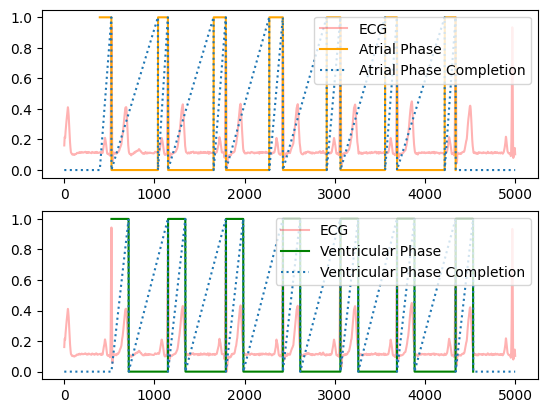

In [ ]:
_, rpeaks = nk.ecg_peaks(senal_SB)

signals, waves = nk.ecg_delineate(senal_SB, rpeaks, sampling_rate=1000)

cardiac_phase = nk.ecg_phase(ecg_cleaned=senal_SB, rpeaks=rpeaks,
                             delineate_info=waves, sampling_rate=1000)


_, ax = plt.subplots(nrows=2)

ax[0].plot(nk.rescale(senal_SB), label="ECG", color="red", alpha=0.3)
ax[0].plot(cardiac_phase["ECG_Phase_Atrial"], label="Atrial Phase", color="orange")
ax[0].plot(cardiac_phase["ECG_Phase_Completion_Atrial"], label="Atrial Phase Completion", linestyle="dotted")
ax[0].legend(loc="upper right")
ax[1].plot(nk.rescale(senal_SB), label="ECG", color="red", alpha=0.3)
ax[1].plot(cardiac_phase["ECG_Phase_Ventricular"], label="Ventricular Phase", color="green")
ax[1].plot(cardiac_phase["ECG_Phase_Completion_Ventricular"], label="Ventricular Phase Completion", linestyle="dotted")
ax[1].legend(loc="upper right")

#### Morfología del ECG (ecg_delineate)

{'ECG_P_Peaks': [452, 1080, 1721, 2353, 2990, 3619, nan],
 'ECG_Q_Peaks': [507, 1117, 1777, 2394, 3045, 3667, nan],
 'ECG_S_Peaks': [533, 1161, 1802, 2434, 3072, 3700, nan],
 'ECG_T_Peaks': [686, 1314, 1954, 2588, 3224, 3853, nan],
 'ECG_P_Onsets': [433, 1058, 1703, 2337, 2963, 3602, nan],
 'ECG_T_Offsets': [711, 1342, 1983, 2615, 3257, 3882, nan]}

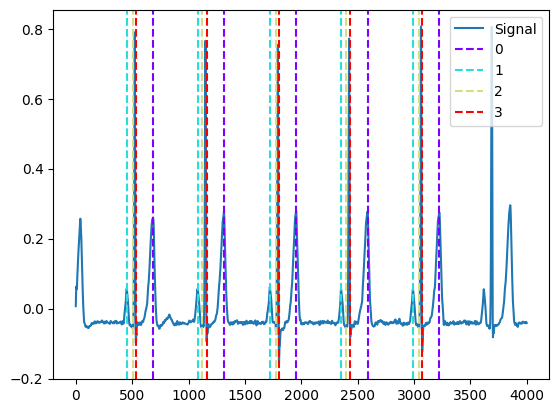

In [ ]:
# ECG data

_, rpeaks = nk.ecg_peaks(senal_SB, sampling_rate=1000) # Picos R

info, waves_peak = nk.ecg_delineate(senal_SB, rpeaks, sampling_rate=1000, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], senal_SB[:4000])

waves_peak

#### Relación ECG-respiración (ecg_rsp)

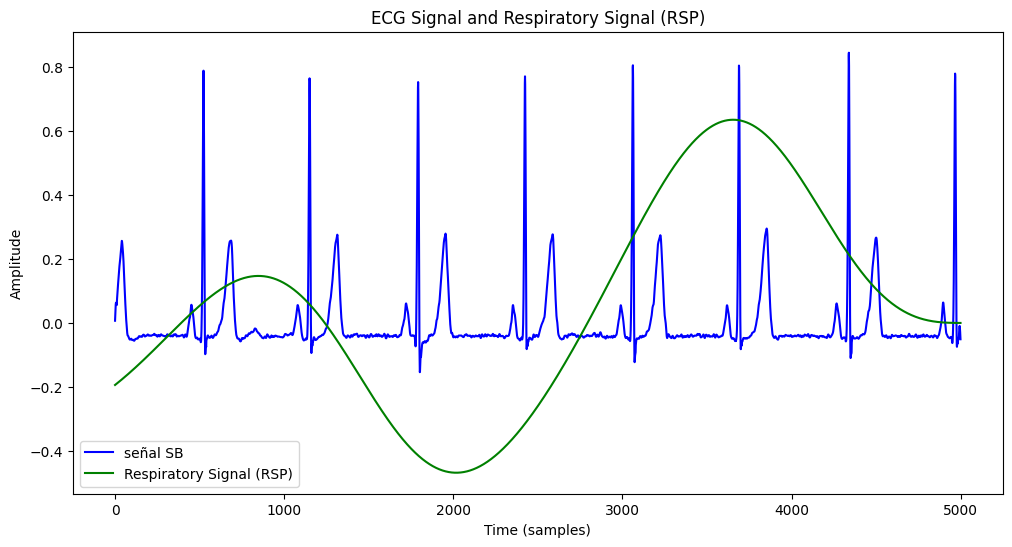

In [ ]:
rpeaks, info = nk.ecg_peaks(senal_SB, sampling_rate=1000)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=1000, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
rsp_signal = nk.ecg_rsp(ecg_rate, sampling_rate=1000)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Plotear la señal de ECG
plt.plot(senal_SB, label="señal SB", color='b')

# Plotear la señal de respiración (RSP)
plt.plot(rsp_signal, label="Respiratory Signal (RSP)", color='g')

# Agregar título y etiquetas
plt.title("ECG Signal and Respiratory Signal (RSP)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()

# Mostrar el gráfico
plt.show()


#### Variabilidad de la frecuencia cardíaca (HRV) (nk.hrv_time)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,271.117647,203.872473,NaN,NaN,NaN,NaN,NaN,NaN,244.3531,252.292283,0.751971,0.901281,191.0,170.499,0.892665,207.0,0.834336,112.2,424.8,76.470588,88.235294,39.0,642.0,8.5,117.1875


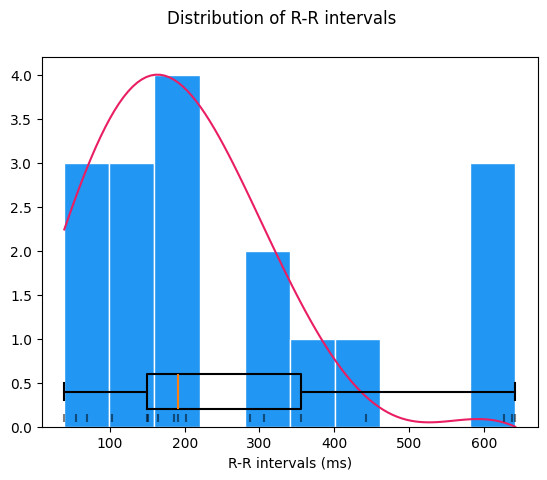

In [ ]:
# Find peaks
peaks, info = nk.ecg_peaks(senal_SB, sampling_rate=100)
hrv_time = nk.hrv_time(peaks, sampling_rate=1000, show=True)
hrv_time

#### Segmentación (ecg_segment)

Número de latidos de la señal ECG:  7


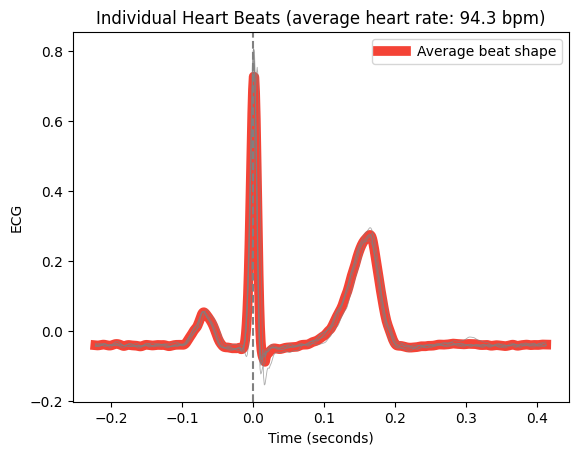

In [ ]:
qrs_epochs = nk.ecg_segment(senal_SB, rpeaks=None, sampling_rate=1000, show=True)

# Como se obtiene una lista con los segmentos de la señal, es posible calcular el número de latidos a partir de su tamaño:

print(f"Número de latidos de la señal ECG: ", len(qrs_epochs))

### **Implementación del tutorial para señal AFIB**

#### Graficación de la señal

<ipython-input-176-4ff548f6a748>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  senal_AFIB = list(df_resultados_AFIB.iloc())[3][1].astype(float)


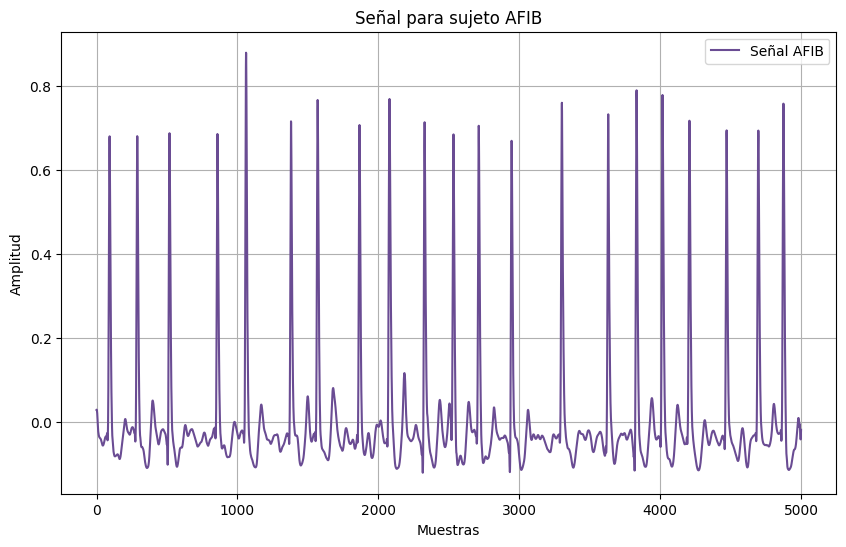

In [ ]:
senal_AFIB = list(df_resultados_AFIB.iloc())[3][1].astype(float)
senal_AFIB = np.array(senal_AFIB)

# Gráfico para la señal AFIB
plt.figure(figsize=(10, 6))
plt.plot(senal_AFIB, label='Señal AFIB', color='#6A4C93')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal para sujeto AFIB')
plt.legend()
plt.grid()
plt.show()

#### Procesamiento y extracción de características de la señal

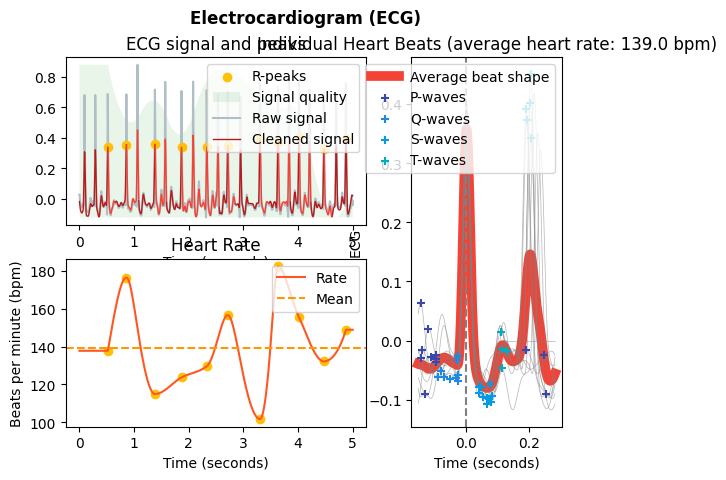

In [ ]:
señalAFIB, infoAFIB = nk.ecg_process(senal_AFIB, sampling_rate=1000)
nk.ecg_plot(señalAFIB, infoAFIB)

In [ ]:
info_df_AFIB = pd.DataFrame(list(infoAFIB.items()), columns=['Metric', 'Value'])
info_df_AFIB

,Metric,Value
0,method_peaks,neurokit
1,method_fixpeaks,None
2,ECG_R_Peaks,"[520, 860, 1382, 1867, 2330, 2713, 3303, 3632, 4018, 4472, 4875]"
3,ECG_R_Peaks_Uncorrected,"[520, 860, 1382, 1867, 2330, 2713, 3303, 3632, 4018, 4472, 4875]"
4,ECG_fixpeaks_ectopic,[]
...,...,...
22,ECG_R_Offsets,"[627, 901, 1418, nan, 2431, 2765, 3351, 3707, 4119, 4519, 4980]"
23,ECG_S_Peaks,"[572, 935, 1454, 1905, 2394, 2753, 3383, 3678, 4082, 4550, nan]"
24,ECG_T_Peaks,"[632, 1062, 1570, nan, 2533, 2822, 3432, 3833, 4208, 4583, 4986]"
25,ECG_T_Onsets,"[604, 1043, 1550, nan, 2515, 2790, 3391, 3814, 4188, 4557, 4952]"


In [ ]:
r_peaks_AFIB = sum(infoAFIB["ECG_R_Peaks"])

# Calcula la desviación estándar
desviacion_estandar_AFIB = np.std(infoAFIB["ECG_R_Peaks"])

print(f"Sumatoria de amplitudes picos R: ",r_peaks_AFIB)
print(f"Desviación estándar picos R: ",desviacion_estandar_AFIB)

Sumatoria de amplitudes picos R:  29972
Desviación estándar picos R:  1399.3284812177258


In [ ]:
señalAFIB

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.027929,-0.017492,137.772675,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.028401,-0.020847,137.772675,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.028221,-0.024208,137.772675,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.026864,-0.027577,137.772675,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.024065,-0.030953,137.772675,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.041465,0.021522,148.883375,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4996,-0.042390,0.021079,148.883375,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4997,-0.038550,0.020729,148.883375,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4998,-0.030344,0.020461,148.883375,0.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [ ]:
print(f"Promedio fase ventricular: ",señalAFIB['ECG_Phase_Ventricular'].mean())
print(f"Frecuencia cardiaca promedio: ",señalAFIB['ECG_Rate'].mean())

Promedio fase ventricular:  0.4905876951331497
Frecuencia cardiaca promedio:  139.01990915301627


#### Identificación de picos R

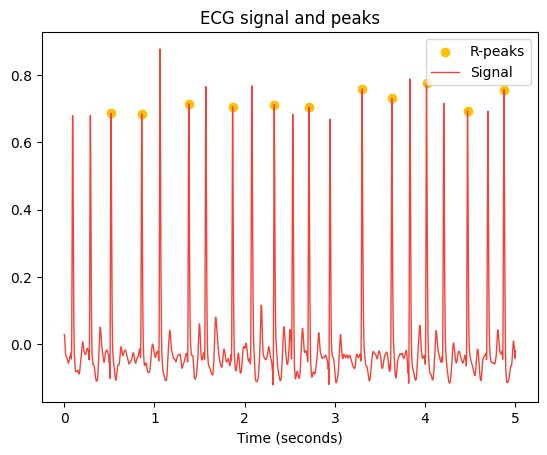

In [ ]:
signals, info = nk.ecg_peaks(senal_AFIB, sampling_rate=1000, correct_artifacts=True, show=True)

#### Frecuencia cardíaca (ecg_rate y signal_rate)

array([137.74104683, 137.74104683, 137.74104683, ..., 148.88337469,
       148.88337469, 148.88337469])

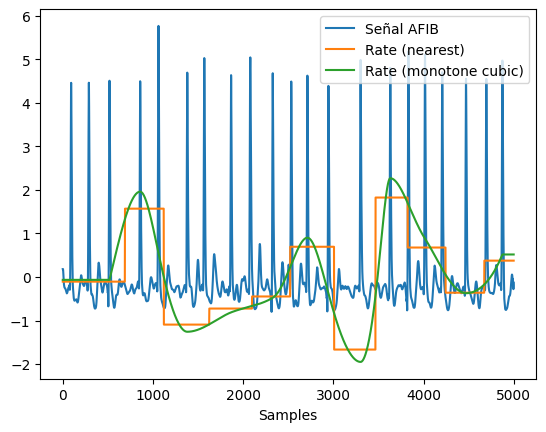

In [ ]:
rpeaks, info = nk.ecg_peaks(senal_AFIB, sampling_rate=1000)

# Compute rate using 2 methods
rate1 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(senal_AFIB),
                       interpolation_method="nearest")


rate2 = nk.signal_rate(peaks=rpeaks,
                       desired_length=len(senal_AFIB),
                       interpolation_method="monotone_cubic")


# Visualize signal and rate on the same scale
nk.signal_plot([senal_AFIB, rate1, rate2], labels = ["Señal AFIB", "Rate (nearest)", "Rate (monotone cubic)"], standardize = True)

rate1

In [ ]:
# Calcular la frecuencia cardíaca
heart_rate_AFIB = nk.ecg_rate(senal_AFIB)

# Mostrar la frecuencia cardíaca
heart_rate_AFIB

array([-6.30887910e+09,  1.27140742e+08, -3.34744583e+08, ...,
        1.56221905e+07,  7.31206761e+06,  5.59167286e+06])

#### Identificación de fases cardíacas (ecg_phase)

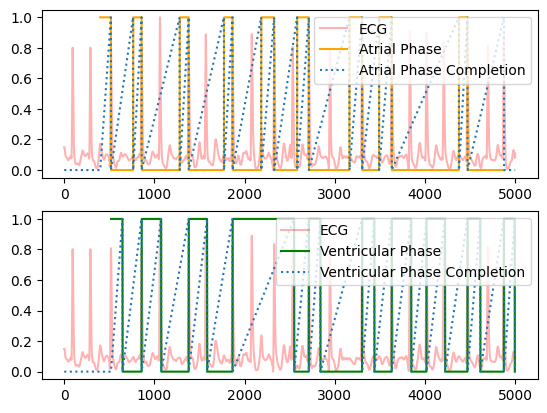

In [ ]:
_, rpeaks = nk.ecg_peaks(senal_AFIB)

signals, waves = nk.ecg_delineate(senal_AFIB, rpeaks, sampling_rate=1000)

cardiac_phase = nk.ecg_phase(ecg_cleaned=senal_AFIB, rpeaks=rpeaks,
                             delineate_info=waves, sampling_rate=1000)


_, ax = plt.subplots(nrows=2)

ax[0].plot(nk.rescale(senal_AFIB), label="ECG", color="red", alpha=0.3)
ax[0].plot(cardiac_phase["ECG_Phase_Atrial"], label="Atrial Phase", color="orange")
ax[0].plot(cardiac_phase["ECG_Phase_Completion_Atrial"], label="Atrial Phase Completion", linestyle="dotted")
ax[0].legend(loc="upper right")
ax[1].plot(nk.rescale(senal_AFIB), label="ECG", color="red", alpha=0.3)
ax[1].plot(cardiac_phase["ECG_Phase_Ventricular"], label="Ventricular Phase", color="green")
ax[1].plot(cardiac_phase["ECG_Phase_Completion_Ventricular"], label="Ventricular Phase Completion", linestyle="dotted")
ax[1].legend(loc="upper right")

#### Morfología del ECG (ecg_delineate)

{'ECG_P_Peaks': [399,
  nan,
  1282,
  1772,
  2186,
  2642,
  3163,
  3574,
  3941,
  4378,
  nan],
 'ECG_Q_Peaks': [506,
  nan,
  1306,
  1835,
  2316,
  2699,
  3219,
  3608,
  4003,
  4458,
  nan],
 'ECG_S_Peaks': [572,
  932,
  1451,
  1904,
  2396,
  2745,
  3384,
  3676,
  4084,
  4553,
  nan],
 'ECG_T_Peaks': [631,
  1062,
  1570,
  2080,
  2534,
  2946,
  3492,
  3833,
  4208,
  4697,
  nan],
 'ECG_P_Onsets': [370,
  nan,
  1241,
  1750,
  2177,
  2613,
  3153,
  3524,
  3905,
  4348,
  nan],
 'ECG_T_Offsets': [649,
  1076,
  1585,
  2095,
  2549,
  2961,
  3524,
  3847,
  4222,
  4711,
  nan]}

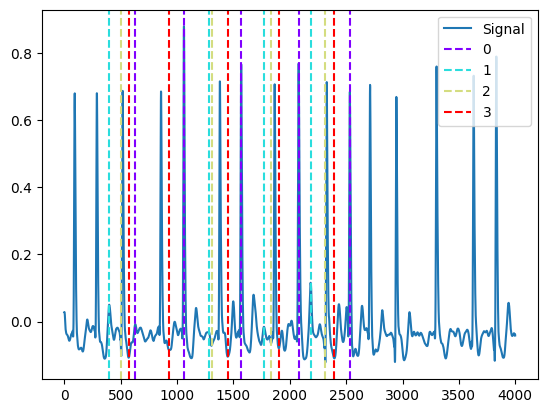

In [ ]:
# ECG data

_, rpeaks = nk.ecg_peaks(senal_AFIB, sampling_rate=1000) # Picos R

info, waves_peak = nk.ecg_delineate(senal_AFIB, rpeaks, sampling_rate=1000, method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], senal_AFIB[:4000])

waves_peak

#### Relación ECG-respiración (ecg_rsp)

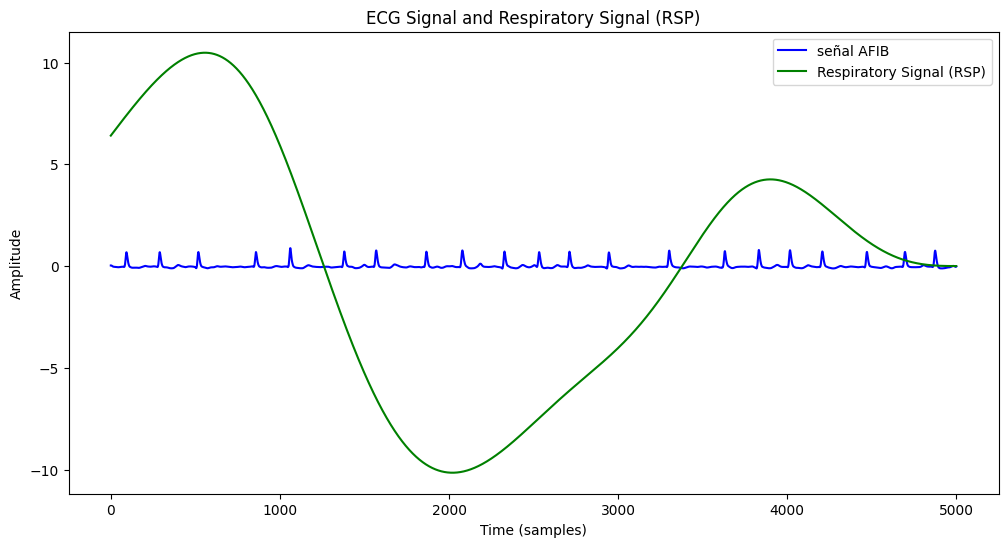

In [ ]:
rpeaks, info = nk.ecg_peaks(senal_AFIB, sampling_rate=1000)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=1000, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
rsp_signal = nk.ecg_rsp(ecg_rate, sampling_rate=1000)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Plotear la señal de ECG
plt.plot(senal_AFIB, label="señal AFIB", color='b')

# Plotear la señal de respiración (RSP)
plt.plot(rsp_signal, label="Respiratory Signal (RSP)", color='g')

# Agregar título y etiquetas
plt.title("ECG Signal and Respiratory Signal (RSP)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()

# Mostrar el gráfico
plt.show()


#### Variabilidad de la frecuencia cardíaca (HRV) (nk.hrv_time)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,239.05,58.317168,NaN,NaN,NaN,NaN,NaN,NaN,82.723382,84.984622,0.243954,0.346051,219.0,44.478,0.203096,77.5,0.704966,190.6,301.4,50.0,85.0,178.0,357.0,6.666667,23.4375


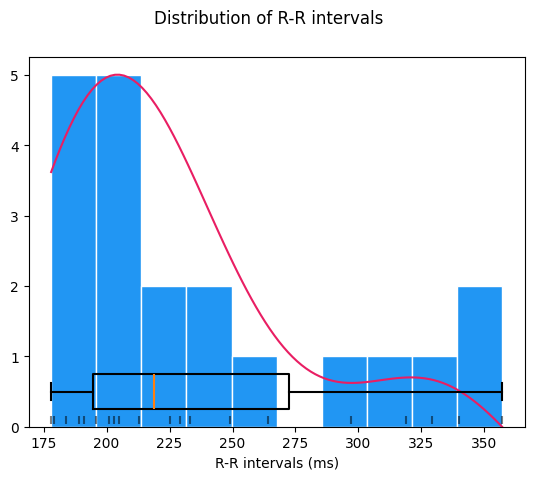

In [ ]:
# Find peaks
peaks, info = nk.ecg_peaks(senal_AFIB, sampling_rate=100)
hrv_time = nk.hrv_time(peaks, sampling_rate=1000, show=True)
hrv_time

#### Segmentación (ecg_segment)

Número de latidos de la señal ECG:  11


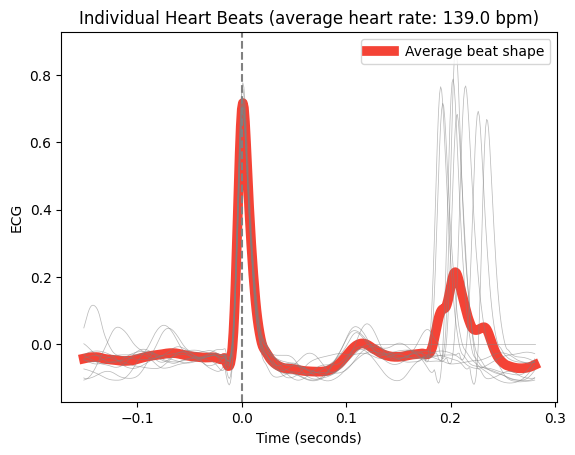

In [ ]:
qrs_epochs = nk.ecg_segment(senal_AFIB, rpeaks=None, sampling_rate=1000, show=True)

# Como se obtiene una lista con los segmentos de la señal, es posible calcular el número de latidos a partir de su tamaño:

print(f"Número de latidos de la señal ECG: ", len(qrs_epochs))

## **Extracción de características para el análisis de señales ECG mediante el uso de Neurokit2**

In [ ]:
def analizar_ecg(signal_ecg, tasa_muestreo=500):

    # Procesar la señal de ECG
    signal, info = nk.ecg_process(signal_ecg, sampling_rate=tasa_muestreo)
    #print(f"Analizando señal: {signal_ecg[:5]}")

    # Sumatoria de picos R
    ecg_r_peaks_sum = sum(info["ECG_R_Peaks"])
    #ecg_p_peaks_sum = sum(info["ECG_P_Peaks"])

    # Media de la fase ventricular del ECG
    fase_ventricular_media = signal["ECG_Phase_Ventricular"].mean()
    frecuencia_cardiaca = signal['ECG_Rate'].mean()

    # Calcular HRV_mean
    r_peaks = info["ECG_R_Peaks"]
    hrv = nk.hrv_time(r_peaks, sampling_rate=tasa_muestreo, show=False)
    hrv_mean = hrv["HRV_MeanNN"].iloc[0] # Media de los intervalos RR
    SDNN = hrv["HRV_SDNN"].values[0] # Desviación estándar de los intervalos RR
    RMSSD = hrv["HRV_RMSSD"].values[0] # Raíz cuadrada de la media de las diferencias sucesivas al cuadrado entre intervalos RR adyacentes
    pNN50 = hrv["HRV_pNN50"].values[0] # Porcentaje de diferencias absolutas en intervalos RR sucesivos mayores de 50 ms

    # Resultados
    resultados = {
        "Sumatoria_picos_R": ecg_r_peaks_sum,
        "Frecuencia_cardiaca": frecuencia_cardiaca,
        "Fase_ventricular_media": fase_ventricular_media,
        "HRV_mean": hrv_mean,
        "SDNN": SDNN,
        "RMSSD": RMSSD,
        "pNN50": pNN50
    }

    return resultados

**Justificación de la elección de las características**

Las características que se obtienen a partir de la implementación de la función analizar_ecg() son:

**1. nk.ecg_process()**

  * **Sumatoria picos R:** Esta característica permite conocer la "carga" total o intensidad general del ECG. Los picos R representan la máxima despolarización de los ventrículos y están estrechamente relacionados con la magnitud de la actividad eléctrica ventricular. El análisis de la amplitud de estos picos permite detectar alteraciones en la actividad eléctrica, lo cual es clave para diferenciar entre Fibrilación Auricular (AFIB) y Bradicardia Sinusal (SB), ya que la AFIB puede presentar variabilidad en la altura de los picos debido a la irregularidad en los latidos, mientras que en SB los picos R suelen ser más consistentes [3].

  * **Frecuencia cardiaca:** La frecuencia cardiaca es uno de los parámetros más representativos del estado del sistema cardiovascular. En la Fibrilación Auricular, la frecuencia cardiaca es típicamente irregular y puede ser variable, mientras que en Bradicardia Sinusal se caracteriza por una frecuencia más baja, pero consistente. El análisis de esta característica es esencial para discriminar entre ambas condiciones [4, 7].

  * **Promedio de la fase ventricular:** Esta métrica proporciona información sobre el comportamiento promedio de la fase ventricular en cada ciclo. En condiciones normales, como la Bradicardia Sinusal, la fase ventricular es más predecible, mientras que en la Fibrilación Auricular, la fase ventricular puede ser errática debido a la desorganización de los impulsos eléctricos. El análisis de este promedio contribuye a la identificación de la regularidad en los latidos del corazón, un distintivo entre las dos patologías [5].

**2. nk.hrv_time:**
  * **Promedio de la variabilidad de la frecuencia cardiaca:** Este parámetro refleja la estabilidad de la frecuencia cardiaca. En la Bradicardia Sinusal, la variabilidad es baja debido a la regularidad de los latidos, mientras que en la Fibrilación Auricular, la variabilidad es mayor debido a la irregularidad en la conducción del ritmo cardíaco. Evaluar esta métrica es fundamental para diferenciar ambas condiciones [6].

  * **Desviación estándar de los intervalos RR:** Indica la variabilidad entre los intervalos entre los latidos sucesivos. En la Fibrilación Auricular, debido a la falta de coordinación entre las aurículas y los ventrículos, los intervalos RR son irregulares, resultando en una desviación estándar alta. En contraste, en la Bradicardia Sinusal, los intervalos RR son más regulares, lo que se traduce en una desviación estándar baja [6].

  * **Raíz cuadrada de la media de las diferencias sucesivas al cuadrado entre intervalos RR adyacentes:** Este parámetro es un indicador importante de la variabilidad de la frecuencia cardiaca y se utiliza ampliamente en el análisis de la actividad autónoma del corazón. En la Fibrilación Auricular, la variabilidad de los intervalos RR es alta debido a la irregularidad de los latidos, mientras que en la Bradicardia Sinusal, los intervalos RR son más constantes, lo que lleva a un valor bajo de RMSSD. Este análisis es crucial para diferenciar la irregularidad de la AFIB y la regularidad de la SB [6].

  * **Porcentaje de diferencias absolutas en intervalos RR sucesivos mayores de 50 ms:** Esta característica ayuda a cuantificar la cantidad de variabilidad en los intervalos RR entre latidos sucesivos. En la Fibrilación Auricular, las diferencias pueden ser significativas debido a la naturaleza irregular de los latidos, lo que genera un porcentaje alto. En la Bradicardia Sinusal, los intervalos son más constantes, resultando en un porcentaje bajo de diferencias mayores de 50 ms [6].

## **Extracción de características de las señales ECG**

Como el set de datos empleado contaba con mayor cantidad de datos de fibrilación auricular que de bradicardia sinusal, se optó por realizar un balance de los datos para evitar el sesgo del modelo hacia la clase mayoritaria (empleando 17000 datos por enfermedad). Esto permite mejorar la generalización del modelo al aprender de manera más efectiva las características de ambas clases, mejorando tanto la sensibilidad como la especificidad. Además, un balance en la cantidad de datos de cada clase también puede ayudar a reducir la varianza del modelo, lo que indica que el modelo será menos propenso a fluctuaciones aleatorias en el conjunto de datos, provocando así un rendimiento más estable en diferentes subconjuntos de datos.

In [ ]:
# Lista para almacenar los resultados
resultados_list_SB = []

for idx, row in df_resultados_SB.iloc[0:1700].iterrows():
    signal_ecg_SB = row["SB_DATA"]
    filename_SB = row["FileName"]
    resultados_SB = analizar_ecg(signal_ecg_SB)  # Aplicar la función

    # Añadir los resultados a la lista
    resultados_list_SB.append({
        "FileName": filename_SB,
        "Sumatoria_picos_R": resultados_SB["Sumatoria_picos_R"],
        "Frecuencia_cardiaca": resultados_SB["Frecuencia_cardiaca"],
        "Fase_ventricular_media": resultados_SB["Fase_ventricular_media"],
        "HRV_mean": resultados_SB["HRV_mean"],
        "SDNN": resultados_SB["SDNN"],
        "RMSSD": resultados_SB["RMSSD"],
        "pNN50": resultados_SB["pNN50"]
    })

# Creación del DataFrame
caracteristicas_SB = pd.DataFrame(resultados_list_SB)

In [ ]:
import warnings

# Lista para almacenar los resultados
resultados_list = []

num_muestras = 1704  # Número de muestras aleatorias

# Seleccionar aleatoriamente las filas del DataFrame, asegurando la reproducibilidad
df_sampled = df_resultados_AFIB.sample(n=num_muestras, random_state=42, replace=False).reset_index(drop=True)

for idx, row in df_sampled.iterrows():  # Iterar sobre el DataFrame muestreado
    signal_ecg_AFIB = row["AFIB_DATA"]
    filename = row["FileName"]

    # Verificar si la señal contiene NaN o está vacía
    if np.isnan(signal_ecg_AFIB).any() or len(signal_ecg_AFIB) == 0:
        continue

    try:
        # Análisis de ECG
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)  # Suprimir advertencias de Numpy
            resultados = analizar_ecg(signal_ecg_AFIB)  # Aplicar la función

        # Verificar si los resultados contienen NaN o arreglos vacíos
        if any(pd.isna(resultados[key]) or (hasattr(resultados[key], '_len_') and len(resultados[key]) == 0) for key in resultados.keys()):
            raise ValueError("Resultados contienen NaN o son vacíos")

        # Si no hubo error, agregar los resultados a la lista
        resultados_list.append({
            "FileName": filename,
            "Sumatoria_picos_R": resultados["Sumatoria_picos_R"],
            "Frecuencia_cardiaca": resultados["Frecuencia_cardiaca"],
            "Fase_ventricular_media": resultados["Fase_ventricular_media"],
            "HRV_mean": resultados["HRV_mean"],
            "SDNN": resultados["SDNN"],
            "RMSSD": resultados["RMSSD"],
            "pNN50": resultados["pNN50"]
        })

    except (ZeroDivisionError, ValueError) as e:
        continue

# Creación del DataFrame
caracteristicas_AFIB = pd.DataFrame(resultados_list)

In [ ]:
caracteristicas_finales = pd.concat([caracteristicas_AFIB, caracteristicas_SB], ignore_index=True) # Concatenar df de ambas enfermedades
caracteristicas_finales

,FileName,Sumatoria_picos_R,Frecuencia_cardiaca,Fase_ventricular_media,HRV_mean,SDNN,RMSSD,pNN50
0,MUSE_20180111_160053_89000.csv,28525,76.466142,0.435964,804.181818,193.842110,303.901300,81.818182
1,MUSE_20180113_124535_69000.csv,36501,92.531125,0.313795,689.076923,329.865241,496.415485,76.923077
2,MUSE_20180114_132437_41000.csv,49294,122.657149,0.573510,498.333333,131.650607,192.647194,55.555556
3,MUSE_20180113_185212_65000.csv,40955,91.443404,0.406504,666.714286,206.764983,215.789071,64.285714
4,MUSE_20180112_073032_10000.csv,46071,116.165914,0.776143,519.647059,77.408770,115.027171,58.823529
...,...,...,...,...,...,...,...,...
3395,MUSE_20180114_123730_01000.csv,21674,56.413868,0.323749,1063.750000,31.083988,26.262412,0.000000
3396,MUSE_20180114_123737_53000.csv,45996,115.374801,0.515736,560.588235,246.268923,459.707516,94.117647
3397,MUSE_20180114_123809_48000.csv,22433,55.129420,0.347759,1088.000000,24.071323,17.004201,0.000000
3398,MUSE_20180114_123811_62000.csv,19099,46.319751,0.312592,1294.333333,34.949487,27.553584,0.000000


## **DataFrame final con características de las señales ECG**

In [ ]:
# Combinar los DataFrames DataFrame_P2 (contiene la fMP) y caracteristicas_finales, basándose en la columna "FileName"
DataFrame_Final = caracteristicas_finales.merge(
    DataFrame_P2[['FileName', 'Estado', 'fMP']],
    on='FileName',
    how='left'
)

# Colocar "Estado" y "fMP" junto a "FileName"
columnas = DataFrame_Final.columns.tolist()
columnas.insert(1, columnas.pop(columnas.index('Estado')))
columnas.insert(2, columnas.pop(columnas.index('fMP')))
DataFrame_Final = DataFrame_Final[columnas]

DataFrame_Final

,FileName,Estado,fMP,Sumatoria_picos_R,Frecuencia_cardiaca,Fase_ventricular_media,HRV_mean,SDNN,RMSSD,pNN50
0,MUSE_20180111_160053_89000.csv,AFIB,2.9,28525,76.466142,0.435964,804.181818,193.842110,303.901300,81.818182
1,MUSE_20180113_124535_69000.csv,AFIB,3.1,36501,92.531125,0.313795,689.076923,329.865241,496.415485,76.923077
2,MUSE_20180114_132437_41000.csv,AFIB,2.3,49294,122.657149,0.573510,498.333333,131.650607,192.647194,55.555556
3,MUSE_20180113_185212_65000.csv,AFIB,5.2,40955,91.443404,0.406504,666.714286,206.764983,215.789071,64.285714
4,MUSE_20180112_073032_10000.csv,AFIB,1.9,46071,116.165914,0.776143,519.647059,77.408770,115.027171,58.823529
...,...,...,...,...,...,...,...,...,...,...
3395,MUSE_20180114_123730_01000.csv,SB,0.9,21674,56.413868,0.323749,1063.750000,31.083988,26.262412,0.000000
3396,MUSE_20180114_123737_53000.csv,SB,2.6,45996,115.374801,0.515736,560.588235,246.268923,459.707516,94.117647
3397,MUSE_20180114_123809_48000.csv,SB,3.7,22433,55.129420,0.347759,1088.000000,24.071323,17.004201,0.000000
3398,MUSE_20180114_123811_62000.csv,SB,0.8,19099,46.319751,0.312592,1294.333333,34.949487,27.553584,0.000000


## **Normalización de características mediante z-score**

Un z-score es el número de desviaciones estándar de la media de un punto de información. En el momento en que se tienen numerosos ejemplos y se necesita representar la desviación estándar que estos implican (el error típico), se utilizaría esta ecuación de puntuación z [8]:

$$
z = \frac{x - \mu}{\sigma}
$$


Donde:

**x:** Valor original

**μ:** Media de la variable

**σ:** Desviación estándar de la variable


Aplicar el z-score de entrenar una red neuronal es importante porque normaliza las características, transformando cada variable para que tenga una media de 0 y una desviación estándar de 1, lo cual ayuda a evitar la dominancia de características con magnitudes diferentes, ayudar a la convergencia del modelo durante el entrenamiento al reducir la varianza y estabilizar el proceso de optimización, y prevenir rangos numéricos que se pueden dar al manejar características de rangos muy grandes que dificulten la propagación de gradiente.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Normalización
scaler = StandardScaler()
DataFrame_Normalizado = DataFrame_Final.copy() # Nuevo DataFrame
DataFrame_Normalizado[['fMP', 'Sumatoria_picos_R','Frecuencia_cardiaca','Fase_ventricular_media','HRV_mean', 'SDNN', 'RMSSD', 'pNN50']] = scaler.fit_transform(DataFrame_Normalizado[['fMP', 'Sumatoria_picos_R','Frecuencia_cardiaca','Fase_ventricular_media','HRV_mean', 'SDNN', 'RMSSD', 'pNN50']])
DataFrame_Normalizado['Estado'] = LabelEncoder().fit_transform(DataFrame_Normalizado['Estado']) #AFIB: 0, SB: 1

DataFrame_Normalizado

,FileName,Estado,fMP,Sumatoria_picos_R,Frecuencia_cardiaca,Fase_ventricular_media,HRV_mean,SDNN,RMSSD,pNN50
0,MUSE_20180111_160053_89000.csv,0,-0.220398,-0.257975,0.003761,0.069046,-0.284390,1.040705,1.318068,1.278153
1,MUSE_20180113_124535_69000.csv,0,-0.154387,0.477708,0.600778,-0.672039,-0.747615,2.492654,2.768396,1.121402
2,MUSE_20180114_132437_41000.csv,0,-0.418430,1.657697,1.720341,0.903403,-1.515237,0.376855,0.479922,0.437173
3,MUSE_20180113_185212_65000.csv,0,0.538724,0.888532,0.560356,-0.109661,-0.837610,1.178647,0.654264,0.716730
4,MUSE_20180112_073032_10000.csv,0,-0.550451,1.360417,1.479109,2.132579,-1.429463,-0.202137,-0.104838,0.541820
...,...,...,...,...,...,...,...,...,...,...
3395,MUSE_20180114_123730_01000.csv,1,-0.880504,-0.889891,-0.741434,-0.611655,0.760208,-0.696621,-0.773557,-1.341821
3396,MUSE_20180114_123737_53000.csv,1,-0.319414,1.353499,1.449709,0.552945,-1.264700,1.600324,2.491852,1.672005
3397,MUSE_20180114_123809_48000.csv,1,0.043645,-0.819883,-0.789168,-0.466011,0.857799,-0.771476,-0.843305,-1.341821
3398,MUSE_20180114_123811_62000.csv,1,-0.913509,-1.127402,-1.116558,-0.679333,1.688161,-0.655360,-0.763830,-1.341821


## **Arquitecturas de red y matrices de confusión**

Antes de implementar el modelo predictivo, es necesario preparar adecuadamente el conjunto de datos para garantizar que el modelo pueda aprender de manera efectiva. En este paso, se define el conjunto de características (X) y la variable objetivo (y). Las características incluyen los indicadores fisiológicos seleccionados para el análisis, mientras que la variable objetivo representa los estados clínicos (AFIB y SB) convertidos a etiquetas numéricas para el entrenamiento del modelo.

Luego, se divide el conjunto de datos en subconjuntos de entrenamiento y prueba. Esta división se realiza con un enfoque que permita mantener la distribución de clases de la variable objetivo, lo cual es esencial para lograr una representación equilibrada de ambas clases (AFIB y SB). Entonces, al estratificar la división en función del estado, se asegura que el conjunto de entrenamiento (70%) y el conjunto de prueba (30%) reflejen la misma proporción de clases que el conjunto de datos original, evitando un rendimiento sesgado del modelo y una menor capacidad de generalización.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = DataFrame_Normalizado[['fMP', 'Sumatoria_picos_R', 'Frecuencia_cardiaca',
        'Fase_ventricular_media', 'HRV_mean', 'SDNN', 'RMSSD', 'pNN50']]  # Características

y = DataFrame_Normalizado['Estado'] # Etiquetas convertidas a números: 0 = 'AFIB', 1 = 'SB'.

# Dividir los datos manteniendo la proporción de clases (AFIB/SB), train: 70%, test: 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Verificar la distribución de clases por Estado
print("Distribución de clases en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts())

print("\nDistribución de clases en el conjunto de prueba:")
print(pd.Series(y_test).value_counts())

Distribución de clases en el conjunto de entrenamiento:
Estado
1    1190
0    1190
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
Estado
0    510
1    510
Name: count, dtype: int64


##**Implementación de diferentes arquitecturas de red y las matrices de confusión de una red neuronal para la clasificación de las dos patologías cardiacas**

#### **MLPClassifier**

El MLPClassifier (Perceptrón Multicapa) es una opción adecuada para problemas de clasificación en los que las entradas son vectores de características, como las que se encuentran en el dataset utilizado para la clasificación de arritmias o eventos cardíacos. Este clasificador es flexible y potente, permitiendo la modelización de relaciones complejas entre las variables de entrada mediante capas ocultas, y es ideal para tareas en las que se requiere identificar patrones no lineales, como en el análisis de señales ECG.

**Parámetros clave**

**Solver:** El optimizador tiene un impacto directo sobre la rapidez de convergencia y la calidad del modelo final. En este caso, se ha elegido el optimizador 'adam', que es un algoritmo basado en gradiente. Este método ajusta automáticamente los parámetros durante el entrenamiento, lo que facilita un ajuste eficiente, incluso cuando las señales de entrada son ruidosas o presentan grandes variaciones, como ocurre en los datos de ECG. 'Adam' es especialmente útil en contextos con datos complejos y no lineales, permitiendo una rápida convergencia y un modelo robusto para tareas como la clasificación de arritmias o la predicción de eventos cardíacos. [9][10]

**Función de Activación:** La función de activación seleccionada influye en cómo la red aprende y representa las no linealidades en los datos, afectando tanto la velocidad de aprendizaje como la capacidad de generalización del modelo. Se prefiere la función ReLU (Rectified Linear Unit) debido a su alta eficiencia computacional y a la capacidad de evitar algunos de los problemas asociados con otras funciones no lineales, como el desvanecimiento del gradiente. La función ReLU mejora la convergencia del modelo y permite que aprenda representaciones más profundas de los datos, lo que es crucial para mejorar el rendimiento en tareas de clasificación con datos complejos como los ECG. [11]

**Número de Capas y Neuronas:** Determina la capacidad de la red para modelar relaciones complejas. Para determinar los datos de estos parámetros se empleó la fórmula heurística que se presenta a continuación, la cual permite identificar la capacidad adecuada de la red para modelar relaciones complejas sin caer en sobreajuste.

$$
\text{Número de neuronas} = \frac{\text{muestras de datos}}{\text{factor} \times (\text{neuronas de entrada} + \text{neuronas de salida})}
$$

Donde,

**Muestras de datos:** Cantidad total de datos disponibles para el análisis, lo cual es clave para garantizar que la red tenga suficientes datos para entrenar adecuadamente.

**Factor de división:** Ajusta la cantidad de neuronas de acuerdo con el tamaño del conjunto de datos y las características del problema. Generalmente, se usa un factor entre 0 y 10 para regular la complejidad del modelo.

**Neuronas de entrada:** Número de características (en este caso, 9 características más 1 para el sesgo) que alimentan a la red.

**Neuronas de salida:** Posibles estados del modelo, en este caso, las clases de salida (AFIB y SB).

Entonces, la ecuación ajusta el número de neuronas en función de estos parámetros para evitar que el modelo sea demasiado simple (subajuste) o demasiado complejo (sobreajuste). Reemplazando los datos del proyecto, se tiene:

$$
\text{Número de neuronas} = \frac{\text{3400}}{\text{6} \times (\text{9} + \text{2})} = 51
$$

En base a este resultado, se comenzó con una arquitectura de una sola capa de 51 neuronas, proporcionando una capacidad suficiente para capturar patrones básicos en los datos. Luego, para mejorar la capacidad de modelado y permitir una mayor abstracción de las características, se añadió una segunda capa con 25 neuronas, aplicando un factor de división de 2 respecto a la capa anterior (51/2=25). Esta reducción progresiva en el número de neuronas ayuda a mantener la eficiencia del modelo y tratar de evitar el sobreajuste. Finalmente, en la tercera arquitectura, se dividió aún más el número de neuronas, utilizando 12 neuronas en la última capa, siguiendo el mismo patrón (25/2=12). Este enfoque jerárquico permite a la red aprender representaciones más profundas y complejas, mientras mantiene el modelo controlado y eficiente.


Evaluando MLPClassifier con layers: 51...
Precisión en entrenamiento: 0.9824
Precisión en validación: 0.9804


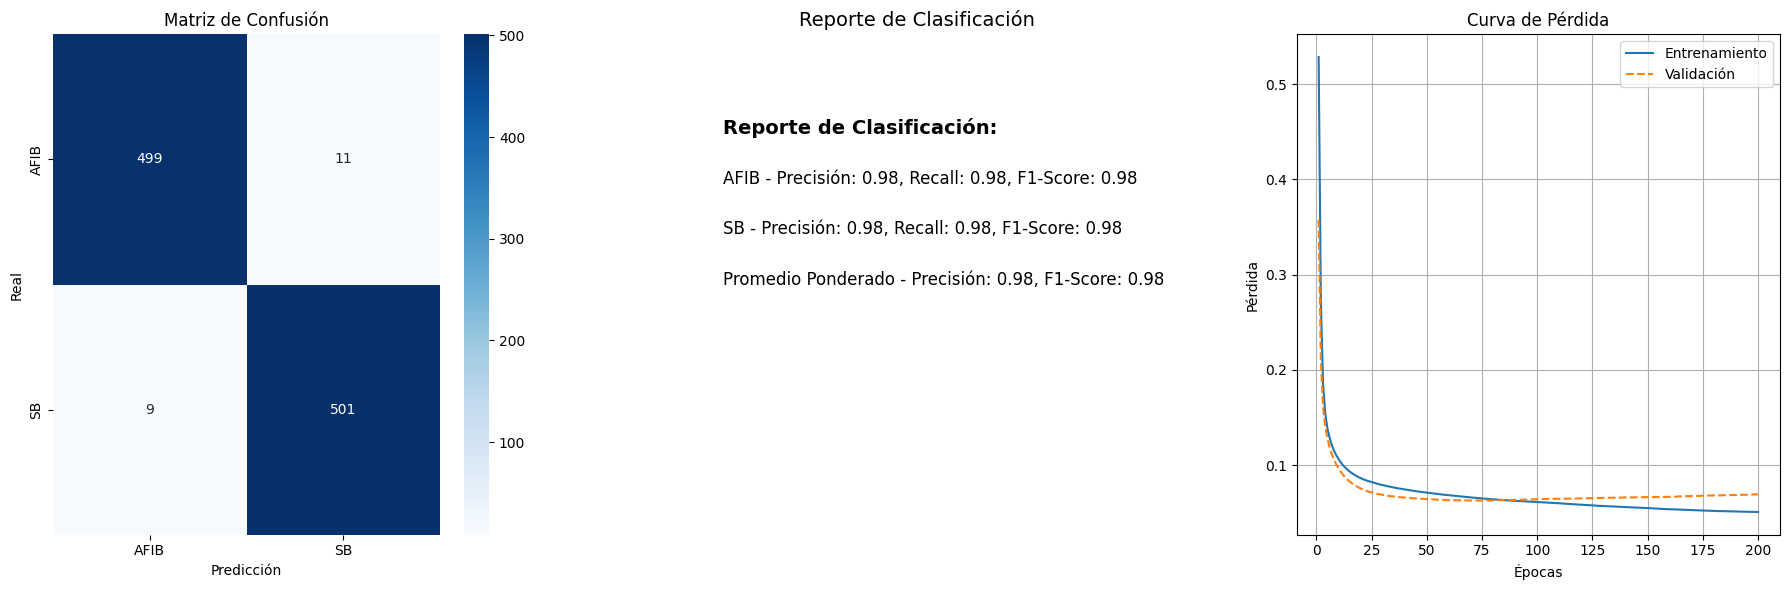


Evaluando MLPClassifier con layers: (51, 25)...
Precisión en entrenamiento: 0.9874
Precisión en validación: 0.9706


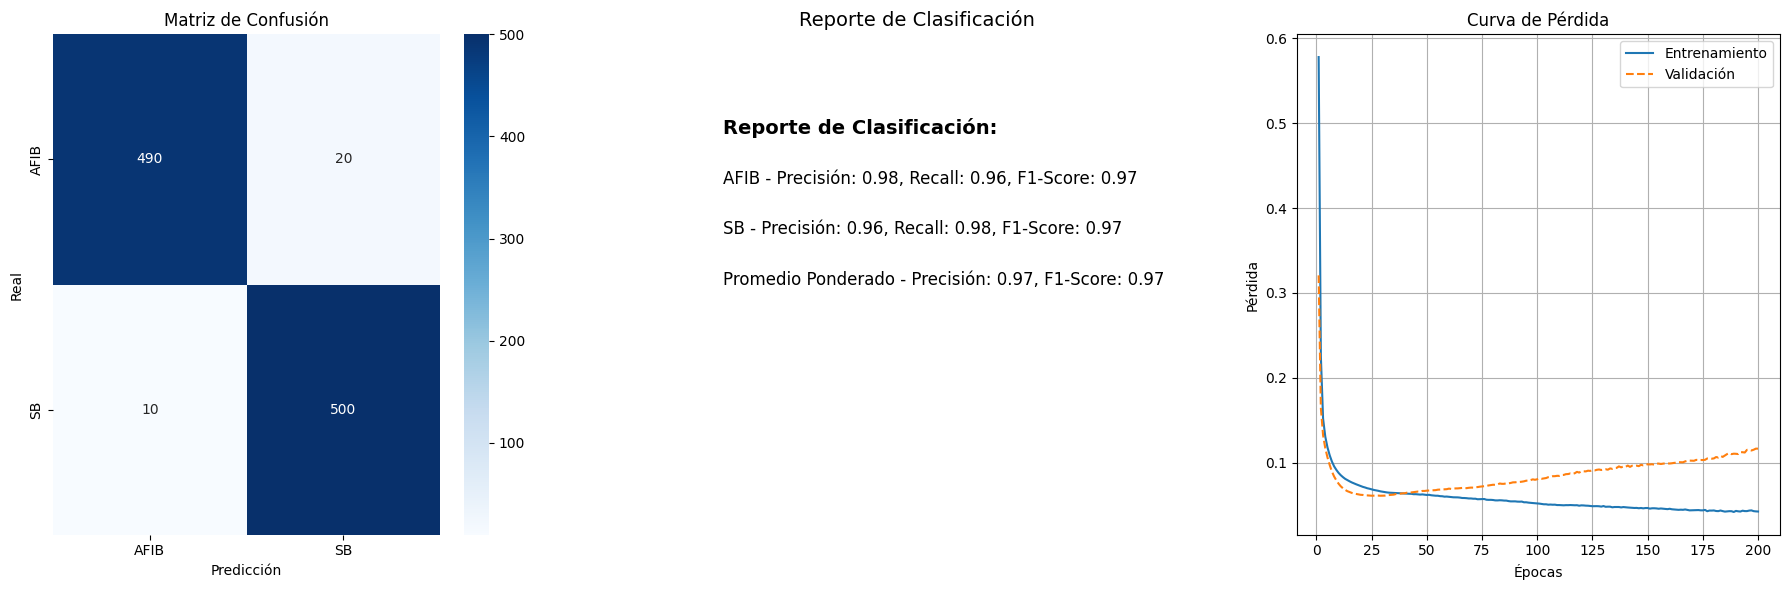


Evaluando MLPClassifier con layers: (51, 25, 12)...
Precisión en entrenamiento: 0.9773
Precisión en validación: 0.9588


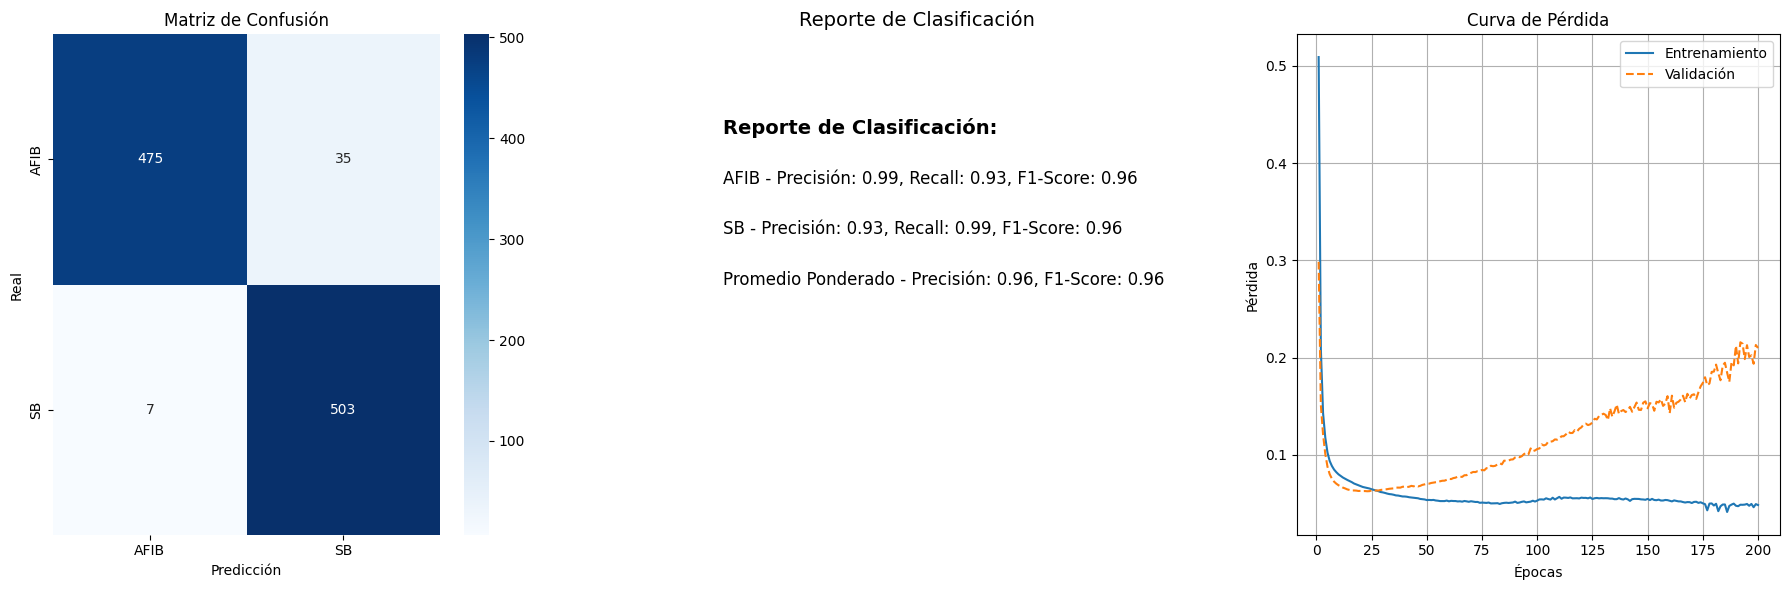

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)


def build_and_evaluate_mlp(layers):
    # Inicializar el modelo con entrenamiento incremental
    model = MLPClassifier(
        hidden_layer_sizes=layers,
        activation='relu',
        solver='adam',
        max_iter=1,  # Una época por vez
        random_state=42,
        learning_rate_init=0.001,
        alpha=0.0001,
        batch_size=64,
        warm_start=True  # Entrenamiento incremental
    )

    # Variables para registrar pérdidas
    train_loss_ = []
    valid_loss_ = []

    # Entrenamiento por 200 épocas
    for epoch in range(200):
        # Entrenar el modelo en el conjunto de entrenamiento
        model.fit(X_train, y_train)

        # Registrar pérdida de entrenamiento
        train_loss_.append(model.loss_)

        # Registrar pérdida de validación
        y_pred_proba = model.predict_proba(X_test)
        valid_loss_.append(log_loss(y_test, y_pred_proba))

    # Predicciones
    y_pred = model.predict(X_test)

    # Precisión en entrenamiento y validación
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
    print(f"Precisión en validación: {test_accuracy:.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualización de resultados
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Matriz de Confusión
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0], xticklabels=['AFIB', 'SB'], yticklabels=['AFIB', 'SB'])
    axs[0].set_title('Matriz de Confusión')
    axs[0].set_xlabel('Predicción')
    axs[0].set_ylabel('Real')

    # Reporte de Clasificación
    cr = classification_report(y_test, y_pred, target_names=['AFIB', 'SB'], output_dict=True)
    axs[1].text(0.1, 0.8, 'Reporte de Clasificación:', fontsize=14, fontweight='bold')
    axs[1].text(0.1, 0.7, f"AFIB - Precisión: {cr['AFIB']['precision']:.2f}, Recall: {cr['AFIB']['recall']:.2f}, F1-Score: {cr['AFIB']['f1-score']:.2f}", fontsize=12)
    axs[1].text(0.1, 0.6, f"SB - Precisión: {cr['SB']['precision']:.2f}, Recall: {cr['SB']['recall']:.2f}, F1-Score: {cr['SB']['f1-score']:.2f}", fontsize=12)
    axs[1].text(0.1, 0.5, f"Promedio Ponderado - Precisión: {cr['accuracy']:.2f}, F1-Score: {cr['macro avg']['f1-score']:.2f}", fontsize=12)
    axs[1].axis('off')
    axs[1].set_title('Reporte de Clasificación', fontsize=14)

    # Curva de Pérdida
    axs[2].plot(range(1, len(train_loss_) + 1), train_loss_, label='Entrenamiento')
    axs[2].plot(range(1, len(valid_loss_) + 1), valid_loss_, label='Validación', linestyle='--')
    axs[2].set_title('Curva de Pérdida')
    axs[2].set_xlabel('Épocas')
    axs[2].set_ylabel('Pérdida')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Configuraciones de capas
configurations = [
    {'layers': (51)},
    {'layers': (51, 25)},
    {'layers': (51, 25, 12)}
]

# Evaluar configuraciones
for config in configurations:
    print(f"\nEvaluando MLPClassifier con layers: {config['layers']}...")
    build_and_evaluate_mlp(layers=config['layers'])



Al analizar los tres modelos en términos de precisión, rendimiento en validación y eficiencia, se observan diferencias significativas en cómo la complejidad de la arquitectura influye en su desempeño. La primera arquitectura, con solo una capa y 51 neuronas, presenta el mejor equilibrio entre precisión de entrenamiento (0.9824) y validación (0.9824), lo que sugiere una excelente capacidad de generalización. Este modelo no solo ofrece buenos resultados en cuanto a las métricas de clasificación como precisión, recall y F1-score, sino que también mantiene una curva de pérdida estable, sin signos evidentes de sobreajuste. En términos de eficiencia, esta arquitectura es la más sencilla y, por ende, probablemente más rápida tanto en entrenamiento como en inferencia. Su bajo número de parámetros la hace ideal para tareas que requieren una alta eficiencia computacional y un buen desempeño sin necesidad de una mayor complejidad.

Por otro lado, la segunda arquitectura, que incorpora una capa adicional y reduce el número de neuronas en la segunda capa a 25, muestra una ligera mejora en la precisión de entrenamiento (0.9874) pero una caída en la precisión de validación (0.9706). Esto indica que, aunque el modelo tiene un buen desempeño en los datos de entrenamiento, comienza a sobreajustarse a medida que la arquitectura se vuelve más compleja. La curva de pérdida refleja este comportamiento, ya que después de las primeras 25 épocas, la pérdida en el conjunto de validación empieza a aumentar, mientras que el entrenamiento sigue mejorando. Desde un punto de vista de eficiencia, la segunda arquitectura es más costosa en términos de recursos computacionales, debido al mayor número de parámetros, lo que podría traducirse en tiempos de entrenamiento y de inferencia más largos, especialmente cuando se aplican en dispositivos con limitaciones de hardware.

Finalmente, la tercera arquitectura, que incluye tres capas con 51, 25 y 12 neuronas respectivamente, muestra un desempeño similar al de la segunda en cuanto a las métricas de clasificación, con una precisión de validación de 0.9588. Sin embargo, es aún más propensa al sobreajuste, como lo indica la curva de pérdida, que comienza a ascender más rápidamente que en la segunda arquitectura después de 25 épocas. Esto sugiere que la mayor complejidad de la red no está contribuyendo de manera significativa a mejorar la generalización. En términos de eficiencia, esta arquitectura es la más costosa, tanto en términos de tiempo de entrenamiento como de capacidad de memoria, debido al aumento considerable en el número de parámetros. Este incremento en la complejidad no parece justificar la pequeña mejora en las métricas de clasificación, lo que sugiere que, en este caso, la mayor cantidad de capas y neuronas no está proporcionando una ventaja significativa sobre la primera arquitectura.

Entonces, se tiene que, aunque las arquitecturas más complejas pueden ofrecer una ligera mejora en la precisión de entrenamiento, los resultados sugieren que la primera arquitectura es la más eficiente tanto en términos de precisión como de recursos computacionales. La complejidad adicional en las siguientes arquitecturas parece introducir problemas de sobreajuste sin una mejora sustancial en el rendimiento, lo que subraya la importancia de encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar.

## **Máquinas de soporte vectorial (SVM)**

Las máquinas de soporte vectorial (support vector machines, SVM) son métodos estadísticos desarrollados por Vladimir Vapnik a mediados de la década de 1960. Inicialmente concebidos para abordar problemas de clasificación binaria (clasificación con dos categorias), se basan en la idea de separar los datos mediante hiperplanos. En la actualidad existen extensiones de esta metodología que permiten la clasificación multiclase (clasificación con más de dos categorías), así como su empleo en regresión y en detección de datos atípicos. El nombre proviene de la utilización de vectores que hacen de soporte para maximizar la separación entre los datos y el hiperplano.  Se considera una metodología muy flexible y con buen rendimiento en un amplio abanico de situaciones, aunque por lo general no es la que consigue los mejores rendimientos [12].

Las SVM son algoritmos de Machine Learning diseñados principalmente para tareas de clasificación. Su objetivo es encontrar un hiperplano óptimo que divida dos clases de datos, maximizando el margen entre ellos. Este margen se define como la distancia más amplia posible entre el hiperplano y los puntos de datos más cercanos de cada clase, llamados vectores de soporte, que determinan la ubicación y orientación del hiperplano [13].

En conjuntos de datos linealmente separables, el algoritmo identifica un hiperplano que clasifica perfectamente las muestras. Sin embargo, en muchos problemas prácticos, los datos no son separables linealmente. Para estos casos, SVM permite un margen flexible, tolerando ciertos errores de clasificación para obtener un modelo más robusto. Esto facilita la separación de datos complejos y reduce el riesgo de sobreajuste [13][14].

Cuando los datos no son linealmente separables en su espacio original, SVM utiliza una técnica conocida como el truco de kernel. Las funciones kernel transforman implícitamente los datos a un espacio de características de mayor dimensión, donde las clases pueden separarse linealmente. Este proceso se realiza sin la necesidad de calcular explícitamente la transformación, lo que evita una alta carga computacional [14].


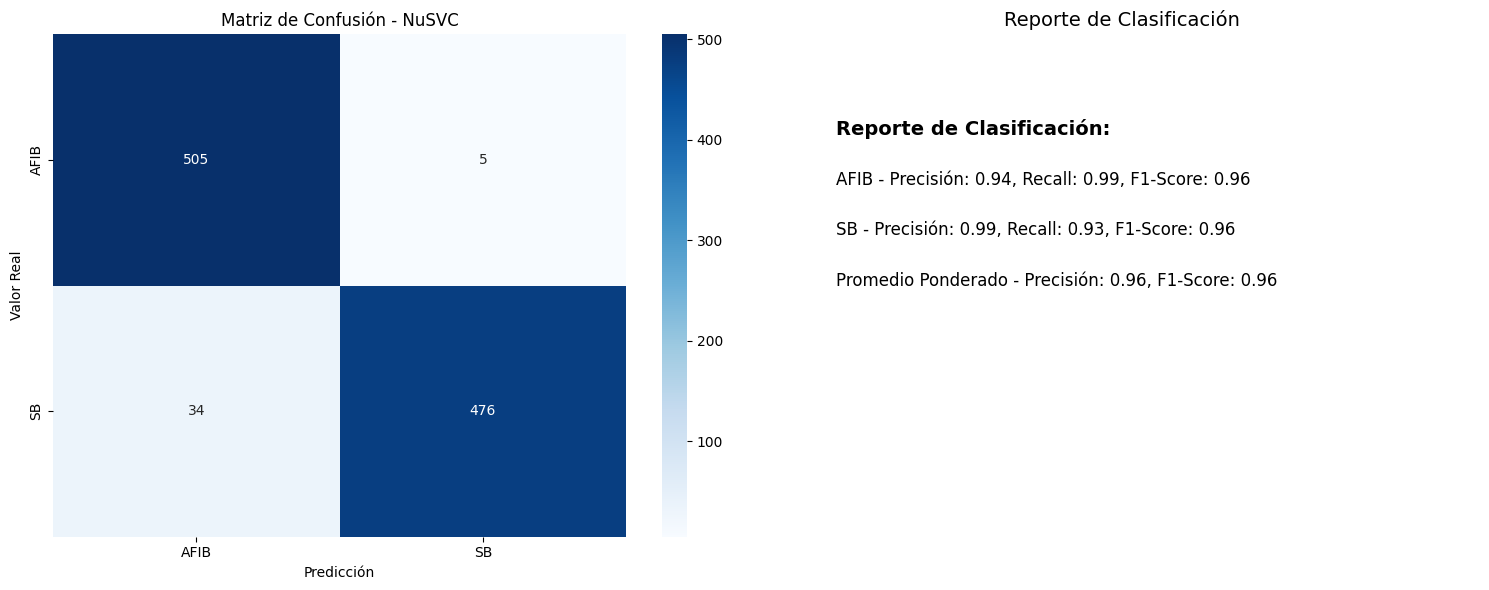

In [ ]:
from sklearn.svm import NuSVC

# Inicializar el modelo NuSVC
clf = NuSVC(gamma='auto')
clf.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Definir los nombres de las clases
target_names = ['AFIB', 'SB']

# Reporte de clasificación para los datos de prueba
cr = classification_report(y_test, predict_test, target_names=target_names, output_dict=True)

# Configurar la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión para los datos de prueba
cm_test = confusion_matrix(y_test, predict_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names, ax=axs[0])
axs[0].set_title('Matriz de Confusión - NuSVC')
axs[0].set_xlabel('Predicción')
axs[0].set_ylabel('Valor Real')

# Reporte de Clasificación
axs[1].text(0.1, 0.8, 'Reporte de Clasificación:', fontsize=14, fontweight='bold')
axs[1].text(0.1, 0.7, f"AFIB - Precisión: {cr['AFIB']['precision']:.2f}, Recall: {cr['AFIB']['recall']:.2f}, F1-Score: {cr['AFIB']['f1-score']:.2f}", fontsize=12)
axs[1].text(0.1, 0.6, f"SB - Precisión: {cr['SB']['precision']:.2f}, Recall: {cr['SB']['recall']:.2f}, F1-Score: {cr['SB']['f1-score']:.2f}", fontsize=12)
axs[1].text(0.1, 0.5, f"Promedio Ponderado - Precisión: {cr['accuracy']:.2f}, F1-Score: {cr['macro avg']['f1-score']:.2f}", fontsize=12)
axs[1].axis('off')
axs[1].set_title('Reporte de Clasificación', fontsize=14)

# Mostrar la figura
plt.tight_layout()
plt.show()

Se obtuvo un buen desempeño en la clasificación de las clases AFIB (fibrilación auricular) y SB (sinusoidal) a partir de la implementación del modelo NuSVC (Nu-Support Vector Classification) en el conjunto de datos de prueba. El uso de NuSVC ofrece una ventaja adicional a las mencionadas anteriormente sobre el uso de las máquinas de soporte vectorial, ya que emplea el parámetro nu para regularizar el modelo controlando tanto el número de vectores de soporte como la cantidad de errores aceptables en la clasificación.

Los resultados obtenidos en el reporte de clasificación indican que el modelo ha alcanzado una precisión de 0.94 y un recall de 0.99 en la clasificación de AFIB. Estos valores sugieren que el modelo tiene una excelente capacidad para identificar correctamente las instancias de AFIB, mostrando una baja tasa de falsos negativos. Además, el F1-Score de 0.96 en AFIB refleja un equilibrio adecuado entre la precisión y el recall, lo que indica que el modelo no está favoreciendo un parámetro sobre el otro, sino que mantiene una efectividad general robusta.

Por otro lado, la clase SB presenta una precisión de 0.99 y un recall de 0.93. Aunque el modelo muestra una alta precisión al clasificar los casos de SB, el recall ligeramente inferior indica que hay una proporción más baja de casos de SB que son detectados correctamente en comparación con AFIB. Sin embargo, el F1-Score de 0.96 para esta clase sigue siendo notable, lo que muestra un buen equilibrio entre las métricas de precisión y recall. Entonces, aunque el modelo muestra un buen desempeño al clasificar la bradicardia sinusal, existe un pequeño margen para mejorar su sensibilidad para identificar de manera más efectiva todas las instancias de esta clase, reduciendo los falsos negativos.

El promedio ponderado de precisión (0.96) y F1-Score (0.96) también indica que el modelo está proporcionando una clasificación confiable en general, sin estar sesgado hacia una clase específica. Estos resultados reflejan una buena capacidad del modelo para generalizar, evitando tanto el sobreajuste como el subajuste, un aspecto crucial en problemas de clasificación con datos complejos. Entonces, el uso de NuSVC es una elección acertada para este problema de clasificación pues los resultados sugieren que el modelo ha aprendido eficazmente las diferencias entre las clases AFIB y SB, con un buen equilibrio entre las métricas clave de precisión, recall y F1-Score. Esto quiere decir que NuSVC es una opción robusta y eficiente, especialmente para aplicaciones donde la identificación correcta de ambas clases es esencial, como en el ámbito médico para la clasificación de arritmias.

## **Algoritmo K means [15]**

El algoritmo k-means es un método de agrupamiento que trabaja conjunto de datos que son descritos por valores numéricos, su objetivo es encontrar una partición de ese conjunto, la cual consiste en una serie de grupos que son representados por un centro.  Para determinar el número de grupos a crear por el algoritmo, el usuario tiene que definir previamente el valor del parámetro k, el cual indica cuántos grupos se formarán en la partición resultante del conjunto de datos.

La idea de este algoritmo es ir afinando la posición de los centros representativos en el espacio de objetos, iteración a iteración hasta encontrar la mejor partición de los objetos, es decir, encontrar a los grupos que integren a los individuos más parecidos entre ellos.

Con el fin de calcular la distancia que existe entre dos objetos distintos, y así identificar a los objetos más parecidos para crear los grupos, el algoritmo k-means puede emplear funciones de distancia. La distancia euclidiana es una de las más empleadas en la literatura y preferida en el proceso de este algoritmo, la distancia euclidiana mide la distancia más corta entre dos puntos. Entre más pequeño el valor de distancia más cercanos son los objetos comparados y por ende más similares.

Para llevar a cabo el proceso del algoritmo k-means se define a priori el número de grupos a formar. Considerando ese valor, se inicializan los centros que representarán a cada grupo. De forma inicial, los centros tienen que asegurar que al menos un objeto será asignado a un grupo (esto se asegura de forma aleatoria), los objetos del conjunto de datos a procesar serán agrupados de la siguiente manera:

1.	Calcular la distancia entre todos los objetos y los centros de cada grupo.
2.	Identificar con cuál centro es más cercano cada uno de los objetos.
3.	Asignar cada objeto al grupo del centro más cercano.
4.	Recalcular los centros de los grupos considerando los objetos asignados a cada grupo. Para calcular el nuevo centro del grupo j, se obtiene la media de los objetos asignados a j.
5.	Si los centros calculados en la iteración n son iguales a los centros de la iteración n-1, entonces la ejecución del algoritmo termina.


Coeficiente de silueta: 0.47

Número de datos por cluster:
Cluster
0    1760
1    1640
Name: count, dtype: int64


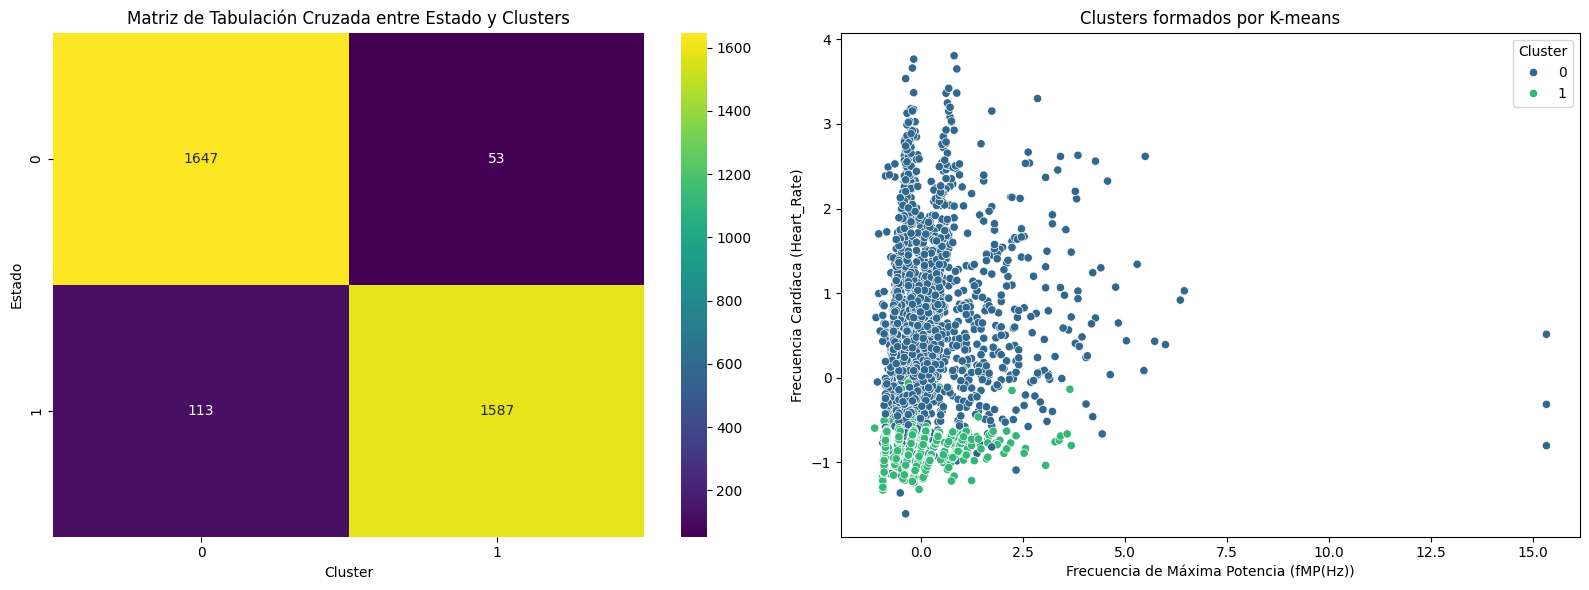

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Eliminar la columna 'Estado' y 'FileName' para entrenar el modelo
X = DataFrame_Normalizado.drop(columns=['Estado', 'FileName'])

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X) # Entrenar el modelo

labels = kmeans.labels_

# Agregar clusters al DataFrame
DataFrame_Normalizado['Cluster'] = labels

# Coeficiente de silueta
sil_score = silhouette_score(X, labels)
print(f'Coeficiente de silueta: {sil_score:.2f}')

# Número de datos por cluster
cluster_counts = DataFrame_Normalizado['Cluster'].value_counts()
print("\nNúmero de datos por cluster:")
print(cluster_counts)

# Tabulación cruzada entre Clusters y Estado
cross_tab = pd.crosstab(DataFrame_Normalizado['Estado'], DataFrame_Normalizado['Cluster'], rownames=['Estado'], colnames=['Cluster'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de calor de la tabulación cruzada
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis', cbar=True, ax=axes[0])
axes[0].set_title('Matriz de Tabulación Cruzada entre Estado y Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Estado')

# Scatterplot de los clusters
sns.scatterplot(data=DataFrame_Normalizado, x='fMP', y='Frecuencia_cardiaca', hue='Cluster', palette='viridis', ax=axes[1])
axes[1].set_title('Clusters formados por K-means')
axes[1].set_xlabel('Frecuencia de Máxima Potencia (fMP(Hz))')
axes[1].set_ylabel('Frecuencia Cardíaca (Heart_Rate)')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.show()

El análisis realizado muestra que el algoritmo de K-means logró agrupar los datos de fibrilación auricular (AFIB = 0) y bradicardia sinusal (SB = 1) en dos clusters con un coeficiente de silueta de 0.47, que es un indicador que evalúa la calidad de los clusters formados, midiendo qué tan separados están los datos dentro de cada cluster y qué tan distintos son entre sí los clusters. Su rango varía de -1 a 1, donde valores cercanos a 1 indican que los clusters están bien definidos y claramente separados, valores cercanos a 0 indican un solapamiento significativo entre los clusters y valores negativos sugieren que muchos puntos están asignados al cluster incorrecto. Entonces, el coeficiente de 0.47 indica una separación moderada entre los clusters, lo que sugiere que las características utilizadas (como la frecuencia de máxima potencia y la frecuencia cardíaca) tienen cierta capacidad para distinguir entre las dos condiciones clínicas, aunque no de manera perfecta. Esto es consistente con la matriz de tabulación cruzada, que muestra una fuerte correspondencia entre los clusters y los estados reales, aunque con algunos errores de clasificación (113 y 53 instancias mal asignadas).

El scatterplot confirma visualmente esta separación, mostrando que los datos dentro de cada cluster están razonablemente agrupados, aunque hay una superposición visible entre los puntos. Esto refuerza la idea de que las características seleccionadas tienen un poder discriminante aunque la separación aún podría mejorar.


## **Equipos comerciales traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG**

## **MAC VU360 Resting ECG [16]:**

El MAC VU360 de GE Healthcare incorpora algoritmos avanzados que permiten un análisis automatizado y detallado de señales de ECG. Estos algoritmos destacan por:

- **Marquette™ 12SL™:** Proporciona precisión y calidad demostradas que cumplen con las normas de la industria. El Marquette™ 12SL es un algoritmo de análisis electrocardiográfico desarrollado por GE Healthcare, ampliamente utilizado en dispositivos de ECG, incluido el MAC VU360. Este algoritmo está diseñado para proporcionar un diagnóstico automatizado y preciso a partir de los datos de 12 derivaciones estándar de ECG.  Este algoritmo realiza una interpretación inicial de las señales, destacando anomalías como isquemia, infartos de miocardio y otros eventos cardíacos y permite identificar arritmias y alteraciones en la conducción eléctrica del corazón. Para realizar estos criterios está basado en estudios clínicos internacionales, el 12SL aplica criterios modernos para mejorar la precisión diagnóstica y es capaz de analizar registros anteriores del mismo paciente para detectar cambios sutiles a lo largo del tiempo.

- **Zero Phase Distortion (ZPD, Distorsión de fase cero):** Ofrece una precisión constante del segmento ST tanto si está realizando un ECG de 12 derivaciones como de ritmo cardíaco.

- **Detección de marcapasos de alta definición:** Identifica la electroestimulación artificial no visible en las ondas del ECG y permite realizar anotaciones sobre marcapasos en tiempo real.

- **Reconocimiento de hipertrofia del ventrículo izquierdo (HVI):** De acuerdo con las recomendaciones de ACC/AHA, incorpora los criterios de Cornell para determinar cuáles son positivos.

- **Módulo de visualización completa:** Selecciona rápidamente un intervalo de 10 segundos disponible en la memoria para no se pierda ni un latido.

Estos algoritmos se destacan por:

- **Detección de Arritmias**: Identifican patrones anormales en los ritmos cardíacos, facilitando la detección temprana de arritmias.

- **Evaluación de Infarto de Miocardio**: Utilizan criterios avanzados para diagnosticar infartos agudos, incluso en etapas tempranas.

- **Interpretación Avanzada**: Ofrecen diagnósticos preliminares basados en un análisis comparativo de señales previas y actuales del paciente, mejorando la precisión en el diagnóstico.




## **Monitoreo con Holter Sistema de Holter DigiTrak XT [17]:**

El Holter DigiTrak XT de Philips utiliza el algoritmo Zymed, que es conocido por su precisión en la detección de eventos cardíacos. Este algoritmo permite analizar datos de ECG con herramientas avanzadas como la detección de marcapasos y la identificación de artefactos para mejorar la calidad del registro. También incluye el sistema EASI, que proporciona un formato de lectura derivado de 12 derivaciones a partir de un número reducido de electrodos, facilitando el análisis y mejorando la eficiencia diagnóstica.

Estos algoritmos están diseñados para proporcionar informes detallados, que incluyen clasificaciones automáticas de eventos, tendencias, y análisis de ritmo, ayudando a los profesionales en la toma de decisiones clínicas.

## **Cardiógrafos PageWriter TC50 [18]:**

El Philips PageWriter TC50 utiliza el algoritmo Philips DXL para la interpretación de electrocardiogramas. Este algoritmo ofrece una amplia gama de análisis, incluyendo más de 600 declaraciones interpretativas y criterios específicos para pacientes pediátricos. Además, incluye herramientas de soporte para el diagnóstico de STEMI (Infarto con elevación del segmento ST) como mapas polares de ST y la identificación de arterias coronarias obstruidas. También se destacan las declaraciones de valores críticos, que alertan sobre condiciones que requieren atención médica inmediata.

# **Referencias**

[1] “Optimal multi-stage arrhythmia classification approach - scientific reports”. Nature. Accedido el 28 de noviembre de 2024. [En línea]. Disponible: https://www.nature.com/articles/s41598-020-59821-7

[2] Y. Kotriwar. “Higher order spectral analysis of ECG signals”. arXiv.org e-Print archive. Accedido el 30 de noviembre de 2024. [En línea]. Disponible: https://arxiv.org/pdf/1809.08451

[3] “The QRS complex: ECG features of the Q-wave, R-wave, S-wave & duration –”. Cardiovascular Education. Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://ecgwaves.com/ecg-qrs-complex-q-r-s-wave-duration-interval/

[4] E. Hernández. “Caracterización de las señales ECG de pacientes con COVID-19 para el análisis e identificación de arritmias cardíacas”. Welcome to nginx! Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://repositoriobe.espe.edu.ec/server/api/core/bitstreams/54527c2b-dfad-48b1-9d21-0b1a6b4280a0/content

[5] A. Velraeds. “Improving automatic smartwatch electrocardiogram diagnosis of atrial fibrillation by identifying regularity within irregularity”. MDPI. Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://doi.org/10.3390/s23229283

[6] F. Esgalhado Cardoso. “Peak detection and HRV feature evaluation on ECG and PPG signals”. researchgate. Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://doi.org/10.3390/sym14061139

[7] J. Duan. “Accurate detection of atrial fibrillation events with R-R intervals from ECG signals - PubMed”. PubMed. Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://pubmed.ncbi.nlm.nih.gov/35925979/

[8] Data Science Team. “¿Qué es un Z-Score?” datascience. Accedido el 26 de noviembre de 2024. [En línea]. Disponible: https://datascience.eu/es/matematica-y-estadistica/que-es-un-z-score/

[9] Cole. “Adam optimizer: Summary and python implementation”. Cole Dieckhaus. Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://coledie.com/AdamOptimizer

[10] “Adam | interactive chaos”. Home page | Interactive Chaos. Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://interactivechaos.com/es/manual/tutorial-de-machine-learning/adam

[11] L. M. Hernández, "Las densidades de las capas mieloarquitectónicas usadas como parámetro de inicialización para un Perceptrón Multicapa". Tesis Doctoral Universidad Nacional Autónoma de México, 2004. [En línea]. Disponible: https://ru.dgb.unam.mx/bitstream/20.500.14330/TES01000855379/3/0855379.pdf

[12] R. Fernández Casal. “Capítulo 5 Máquinas de soporte vectorial | Métodos predictivos de aprendizaje estadístico”. R Machinery. Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://rubenfcasal.github.io/aprendizaje_estadistico/svm.html

[13] “SPSS modeler subscription”. IBM - United States. Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://www.ibm.com/docs/es/spss-modeler/saas?topic=models-how-svm-works

[14] “Support vector machine (SVM)”. MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. Accedido el 29 de noviembre de 2024. [En línea]. Disponible: https://la.mathworks.com/discovery/support-vector-machine.html#:~:text=Support%20vector%20machine%20(SVM)%20es,reconocimiento%20de%20imágenes%20y%20voz.

[15] A. Franco-Arcega. “Vista de Sistema de enseñanza para la técnica de agrupamiento k-means”. REPOSITORIO ACADÃMICO DIGITAL. Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://repository.uaeh.edu.mx/revistas/index.php/icbi/article/view/7384/8278

[16] “MAC VU360 Resting ECG”. GE HealthCare Medical Systems and Solutions | GE HealthCare (United States). Accedido el 27 de noviembre de 2024. [En línea]. Disponible: https://www.gehealthcare.com/products/diagnostic-ecg/resting-ecg/mac-vu360?srsltid=AfmBOopVz3zzWMu0NcW8joqso-ol91BPVzcbwGUIkABhOQyRkactsu9V

[17] “Philips monitoreo con holter software”. Philips. Accedido el 30 de noviembre de 2024. [En línea]. Disponible: https://www.philips.com.co/healthcare/product/HC860292/monitoreo-con-holter-software-programa-de-anlisis-de-holter

[18] “Philips Cardiógrafos PageWriter TC50”. Philips. Accedido el 30 de noviembre de 2024. [En línea]. Disponible: https://www.philips.com.co/healthcare/product/HC860310/cardigrafos-pagewriter-tc50-cardigrafo